In [12]:
import os
import matplotlib.pyplot as plt
import utils as ul
from scipy.spatial.transform import Rotation
import numpy as np

In [13]:
bagfilename = "trial_1_0627"
csvNameList = [("mavros-imu-data.csv", True, "imu"),
               ("state_estimator-local_position-odom-UAV0.csv", True, "state_estimator"),
               ("mocap-UAV0.csv", True, "mocap"),
               ("tracking_controller-output_data.csv", True, "output"),
               ("tracking_controller-setpoint_pos_error.csv", True, "pos_error"),
               ("tracking_controller-setpoint_vel_error.csv", True, "vel_error"),
               ("tracking_controller-acc_setpoint.csv", True, "acc_setpoint")]
dir = os.getcwd() + "/data/" + bagfilename + "/"


In [14]:
loggings = dict()
for filename in csvNameList:
    loggings[filename[2]] = ul.ProcessRosbagDataFromCSV(dir + filename[0], calcTime=filename[1])
    
# set start and end data points
startIdx = 0
endIdx = 7700

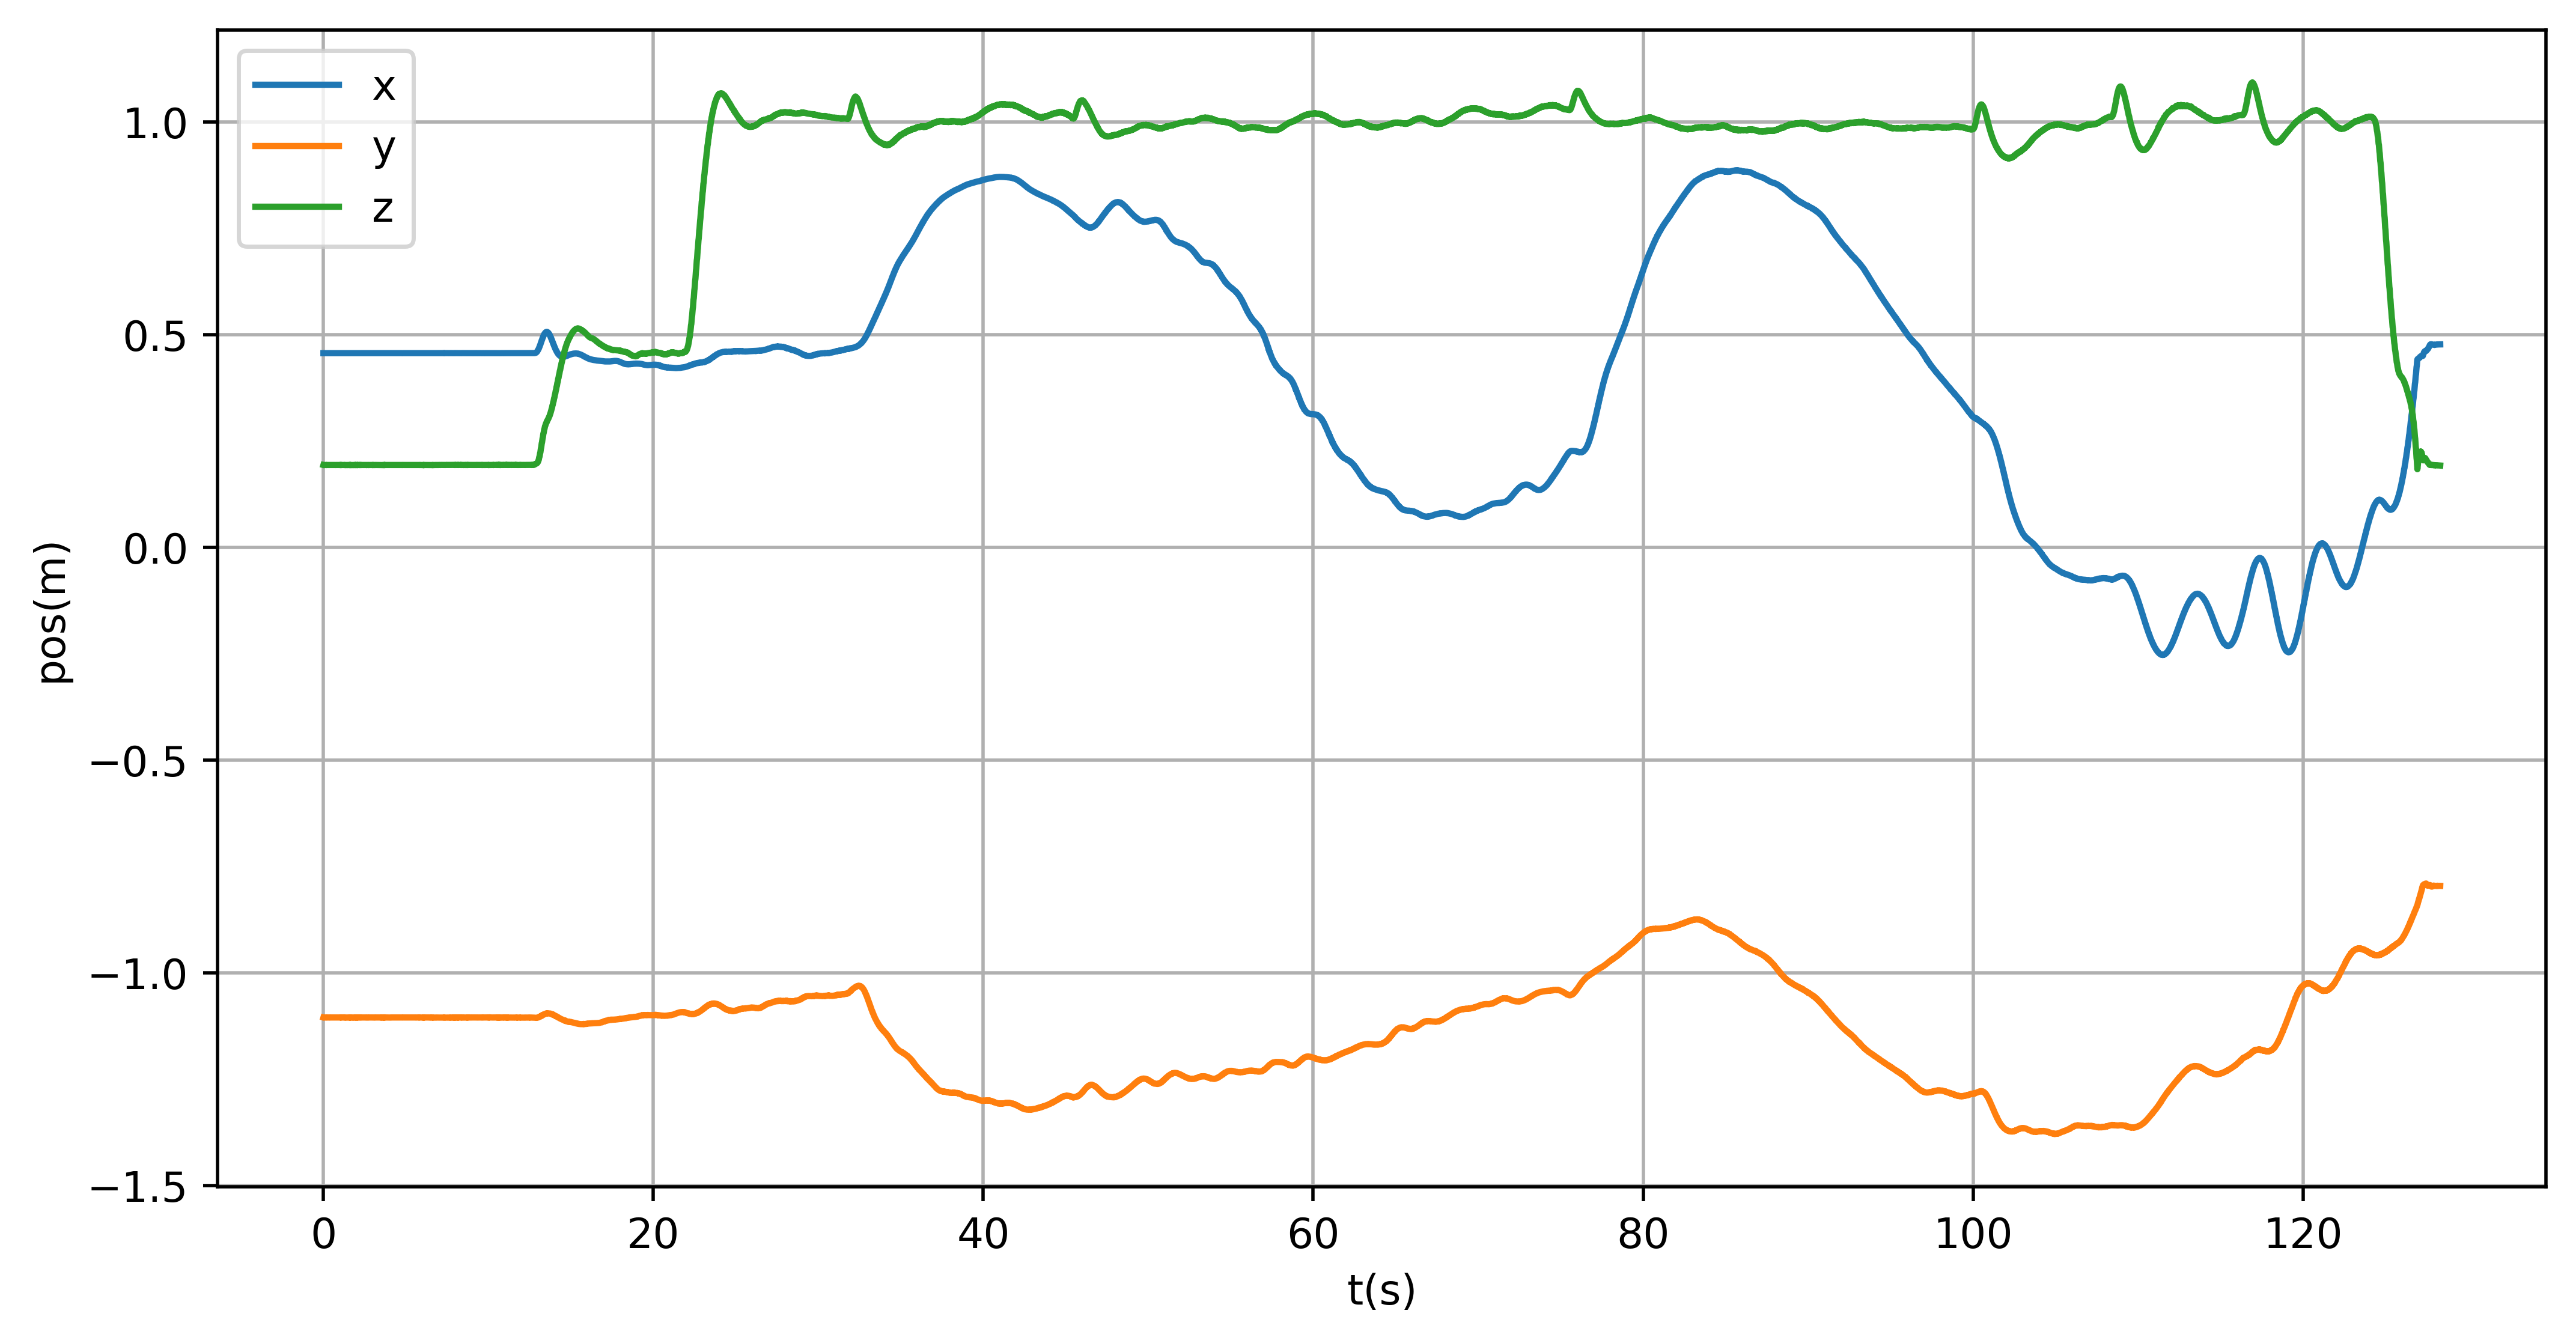

In [4]:
plt.figure(figsize=(10,5), dpi= 500)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.x'][startIdx:endIdx])
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.y'][startIdx:endIdx])
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['pose.position.z'][startIdx:endIdx])
plt.legend(['x', 'y', 'z']) 
plt.ylabel('pos(m)')
plt.xlabel('t(s)')
plt.grid(True)

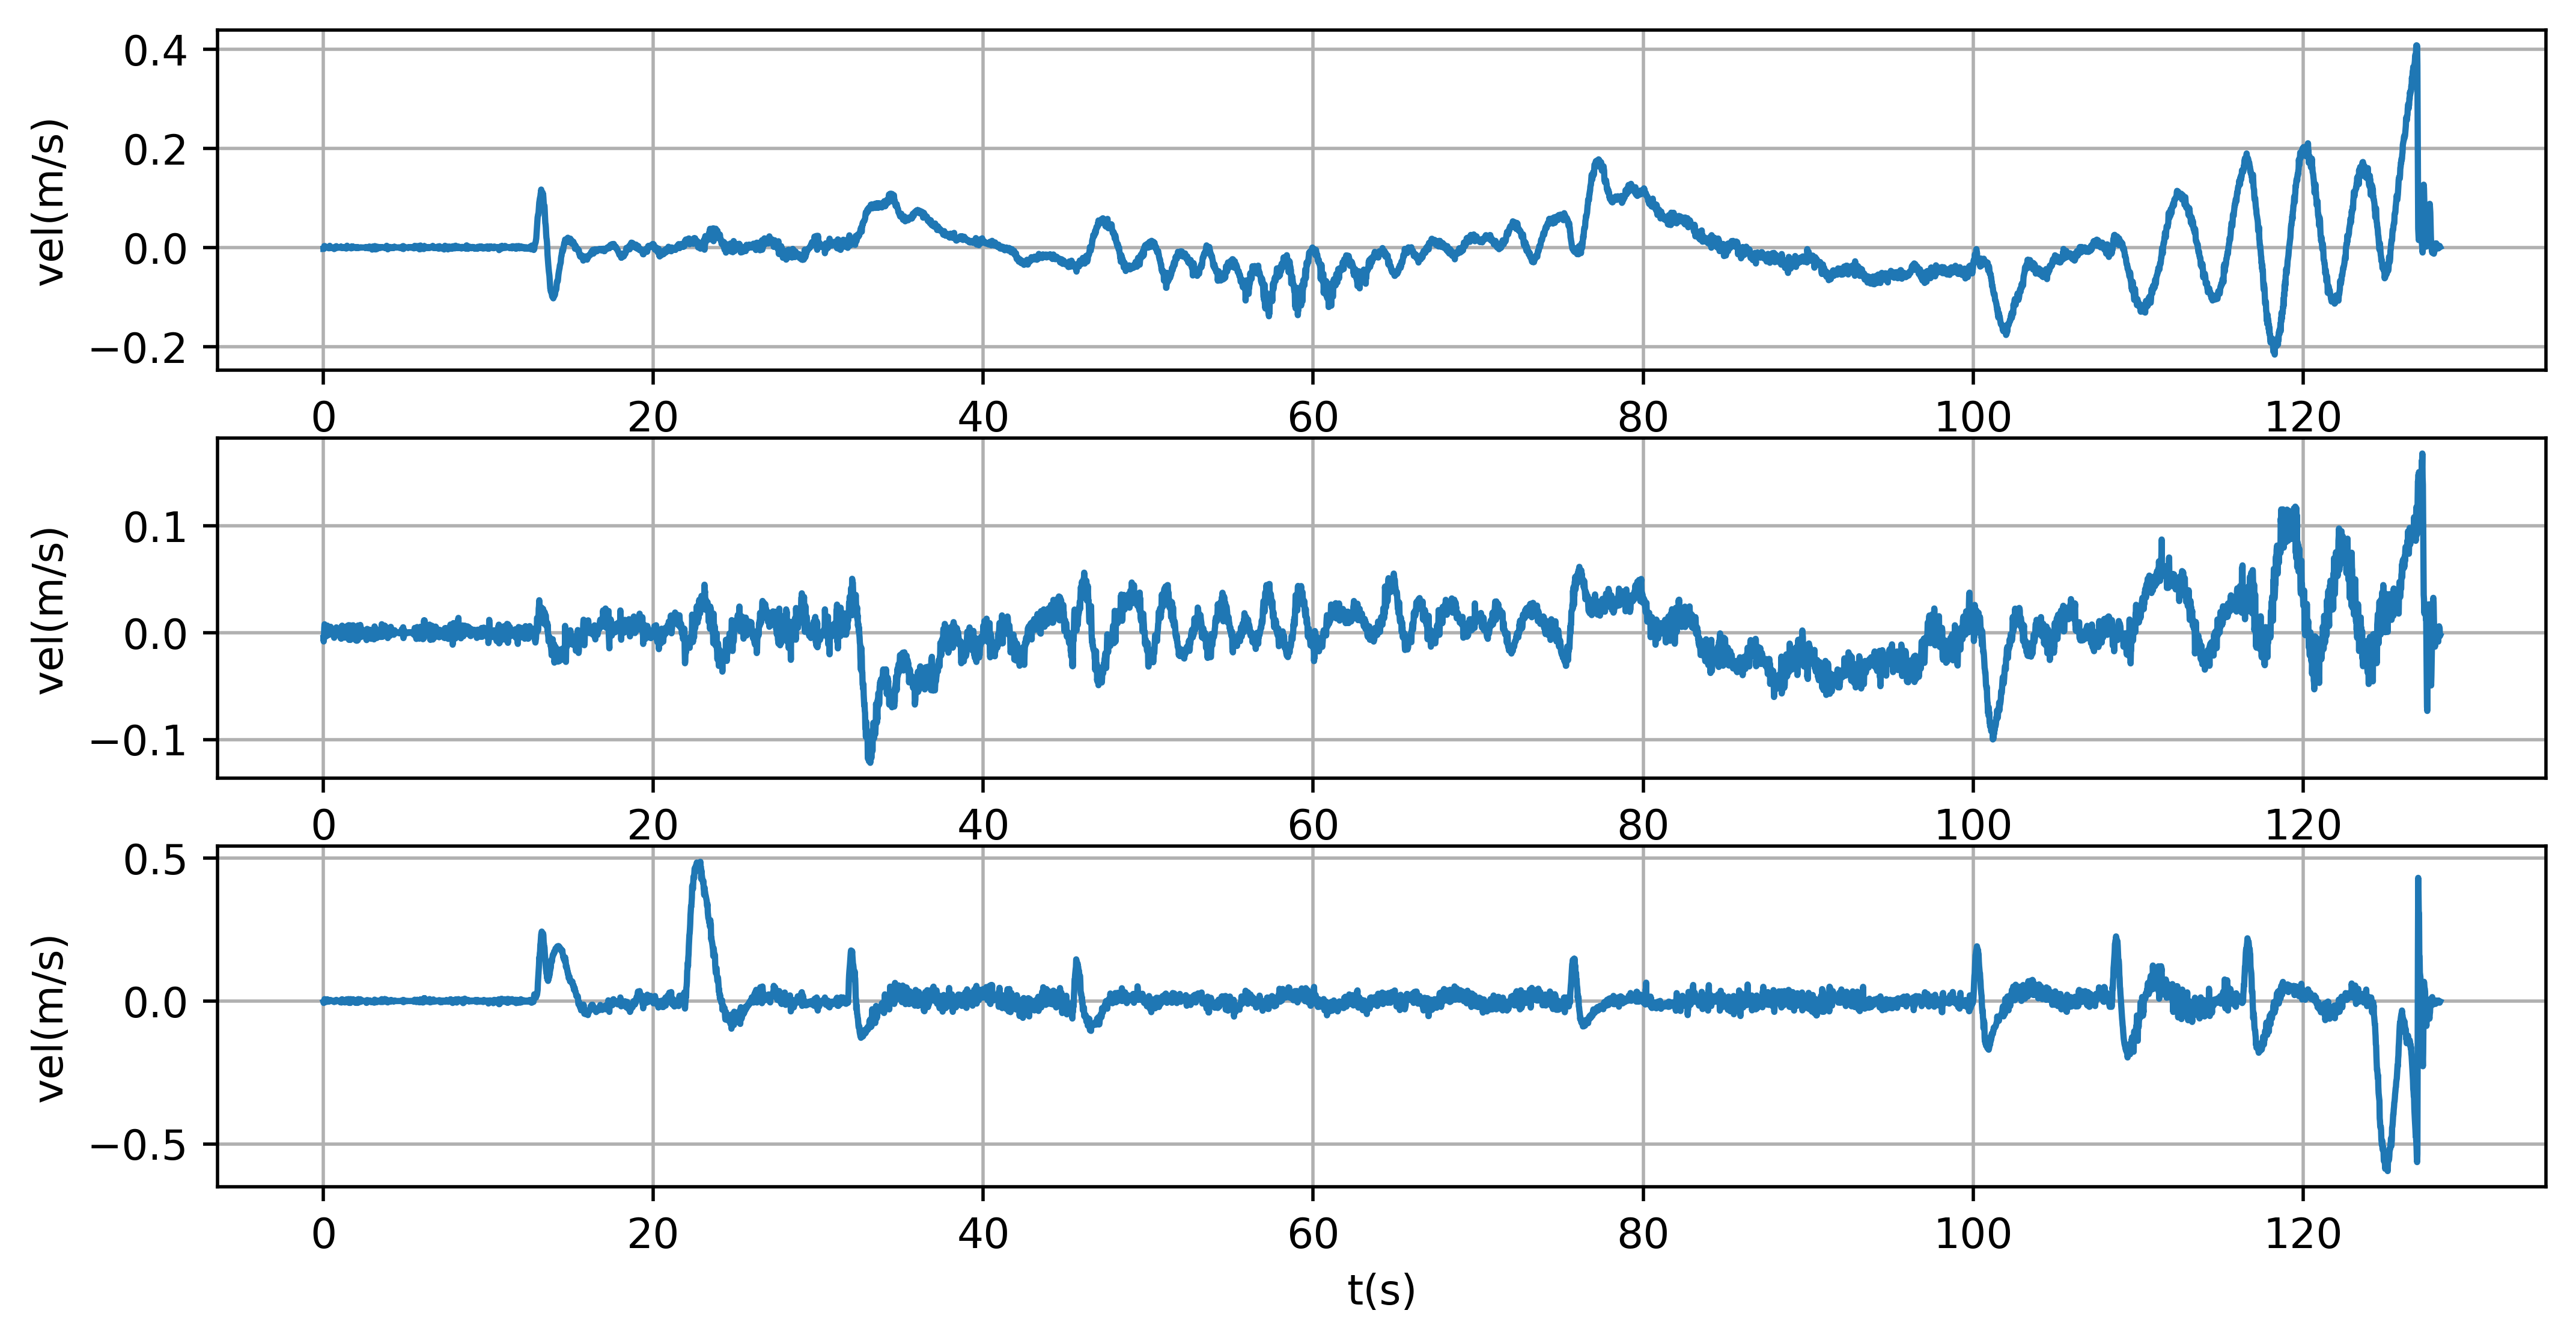

In [22]:
plt.figure(figsize=(10,5), dpi= 500)
plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


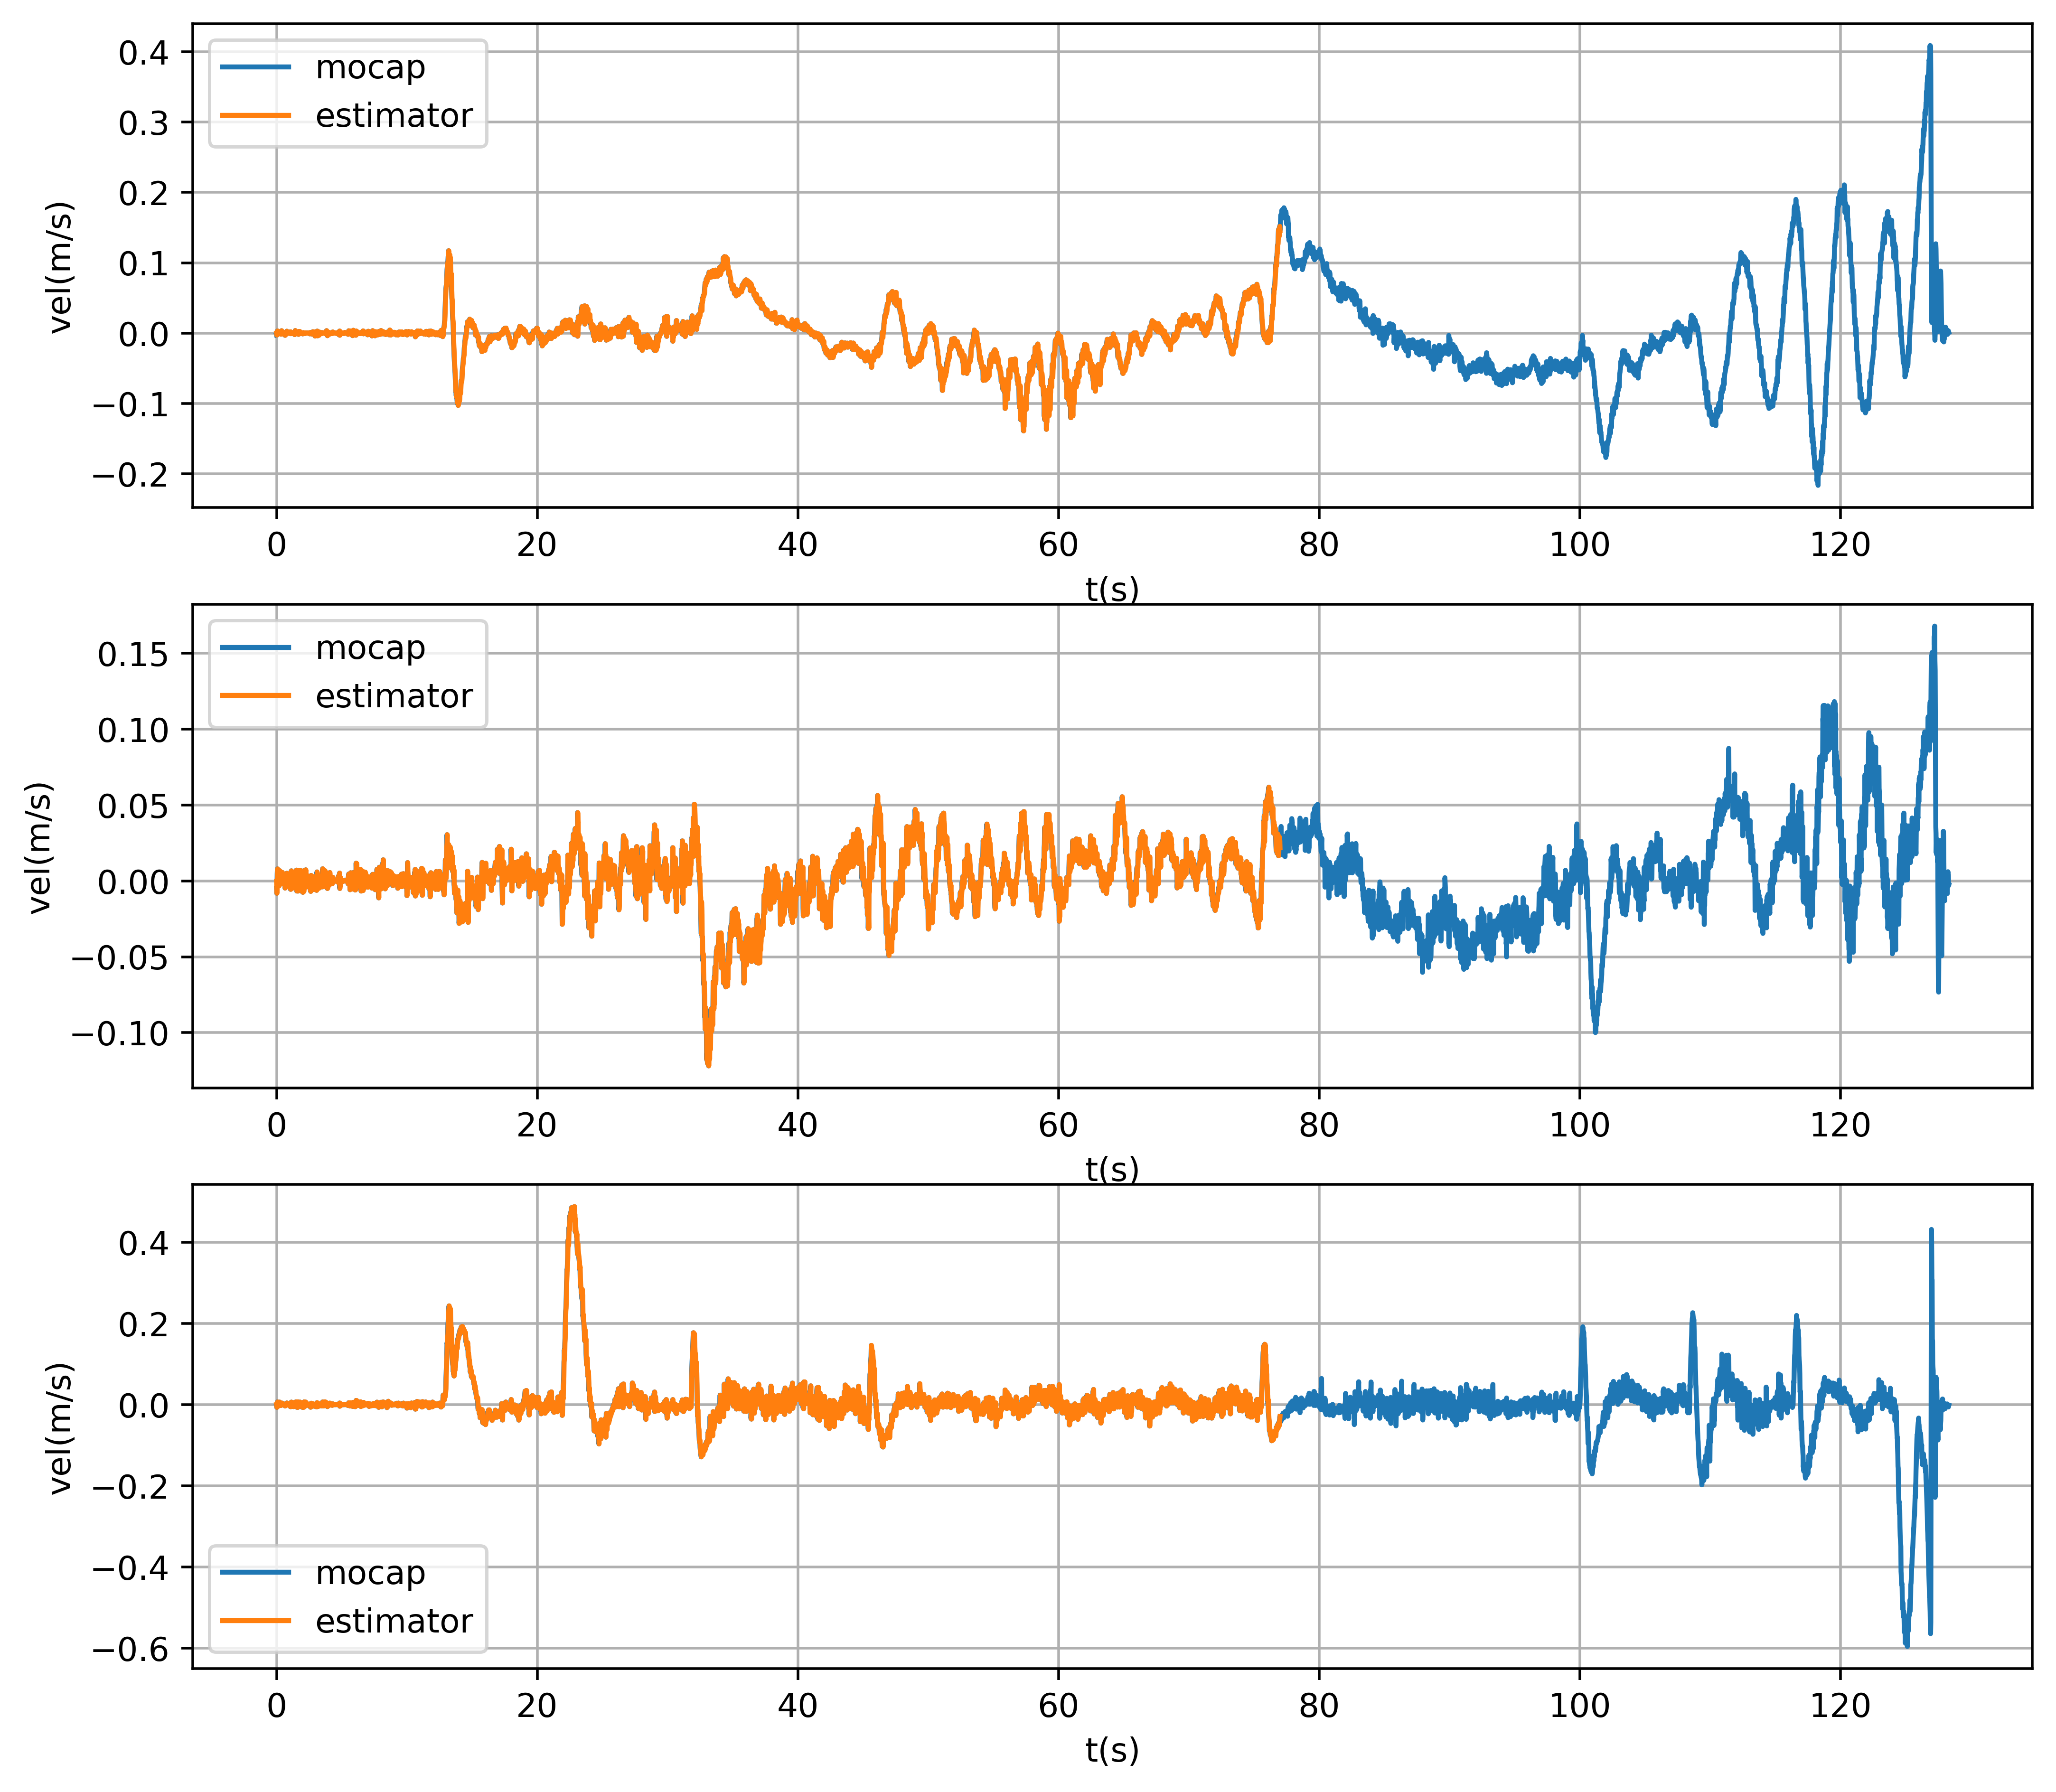

In [34]:
plt.figure(figsize=(10,9), dpi= 500)
plt.subplot(311)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
plt.plot(loggings["state_estimator"]["processed_time"][startIdx:endIdx], loggings["state_estimator"]['twist.twist.linear.x'][startIdx:endIdx])
plt.legend(['mocap', 'estimator']) 
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
plt.plot(loggings["state_estimator"]["processed_time"][startIdx:endIdx], loggings["state_estimator"]['twist.twist.linear.y'][startIdx:endIdx])
plt.legend(['mocap', 'estimator']) 
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx], loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
plt.plot(loggings["state_estimator"]["processed_time"][startIdx:endIdx], loggings["state_estimator"]['twist.twist.linear.z'][startIdx:endIdx])
plt.legend(['mocap', 'estimator']) 
plt.ylabel('vel(m/s)')
plt.xlabel('t(s)')
plt.grid(True)


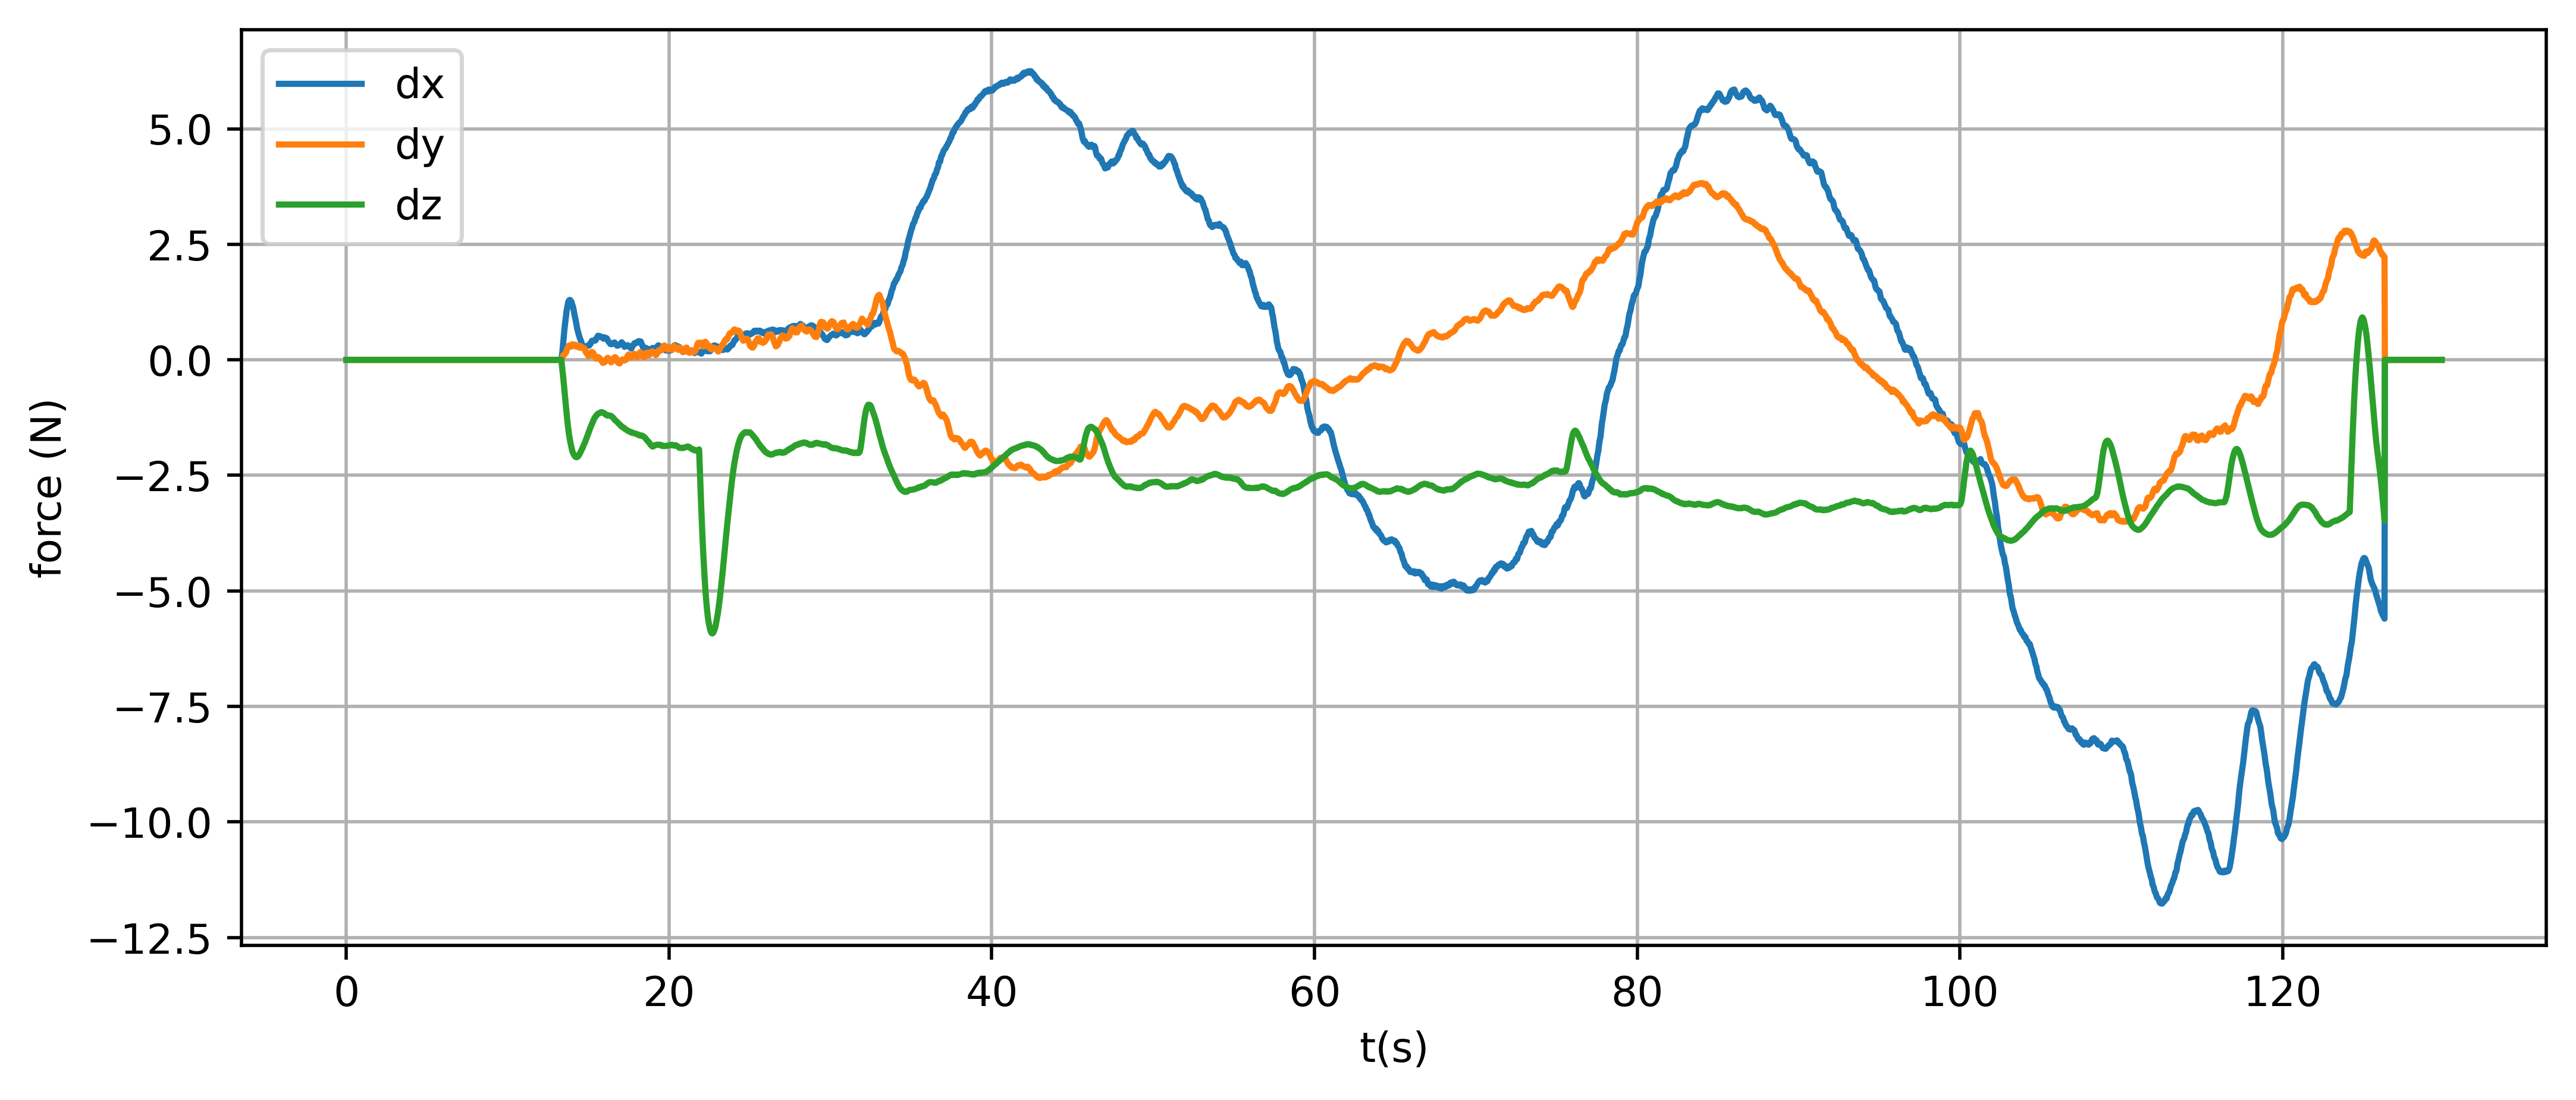

In [16]:
plt.figure(figsize=(10,4), dpi= 500)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.x'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.y'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.z'][startIdx:endIdx])
plt.legend(['dx', 'dy', 'dz']) 
plt.ylabel('force (N)')
plt.xlabel('t(s)')
plt.grid(True)

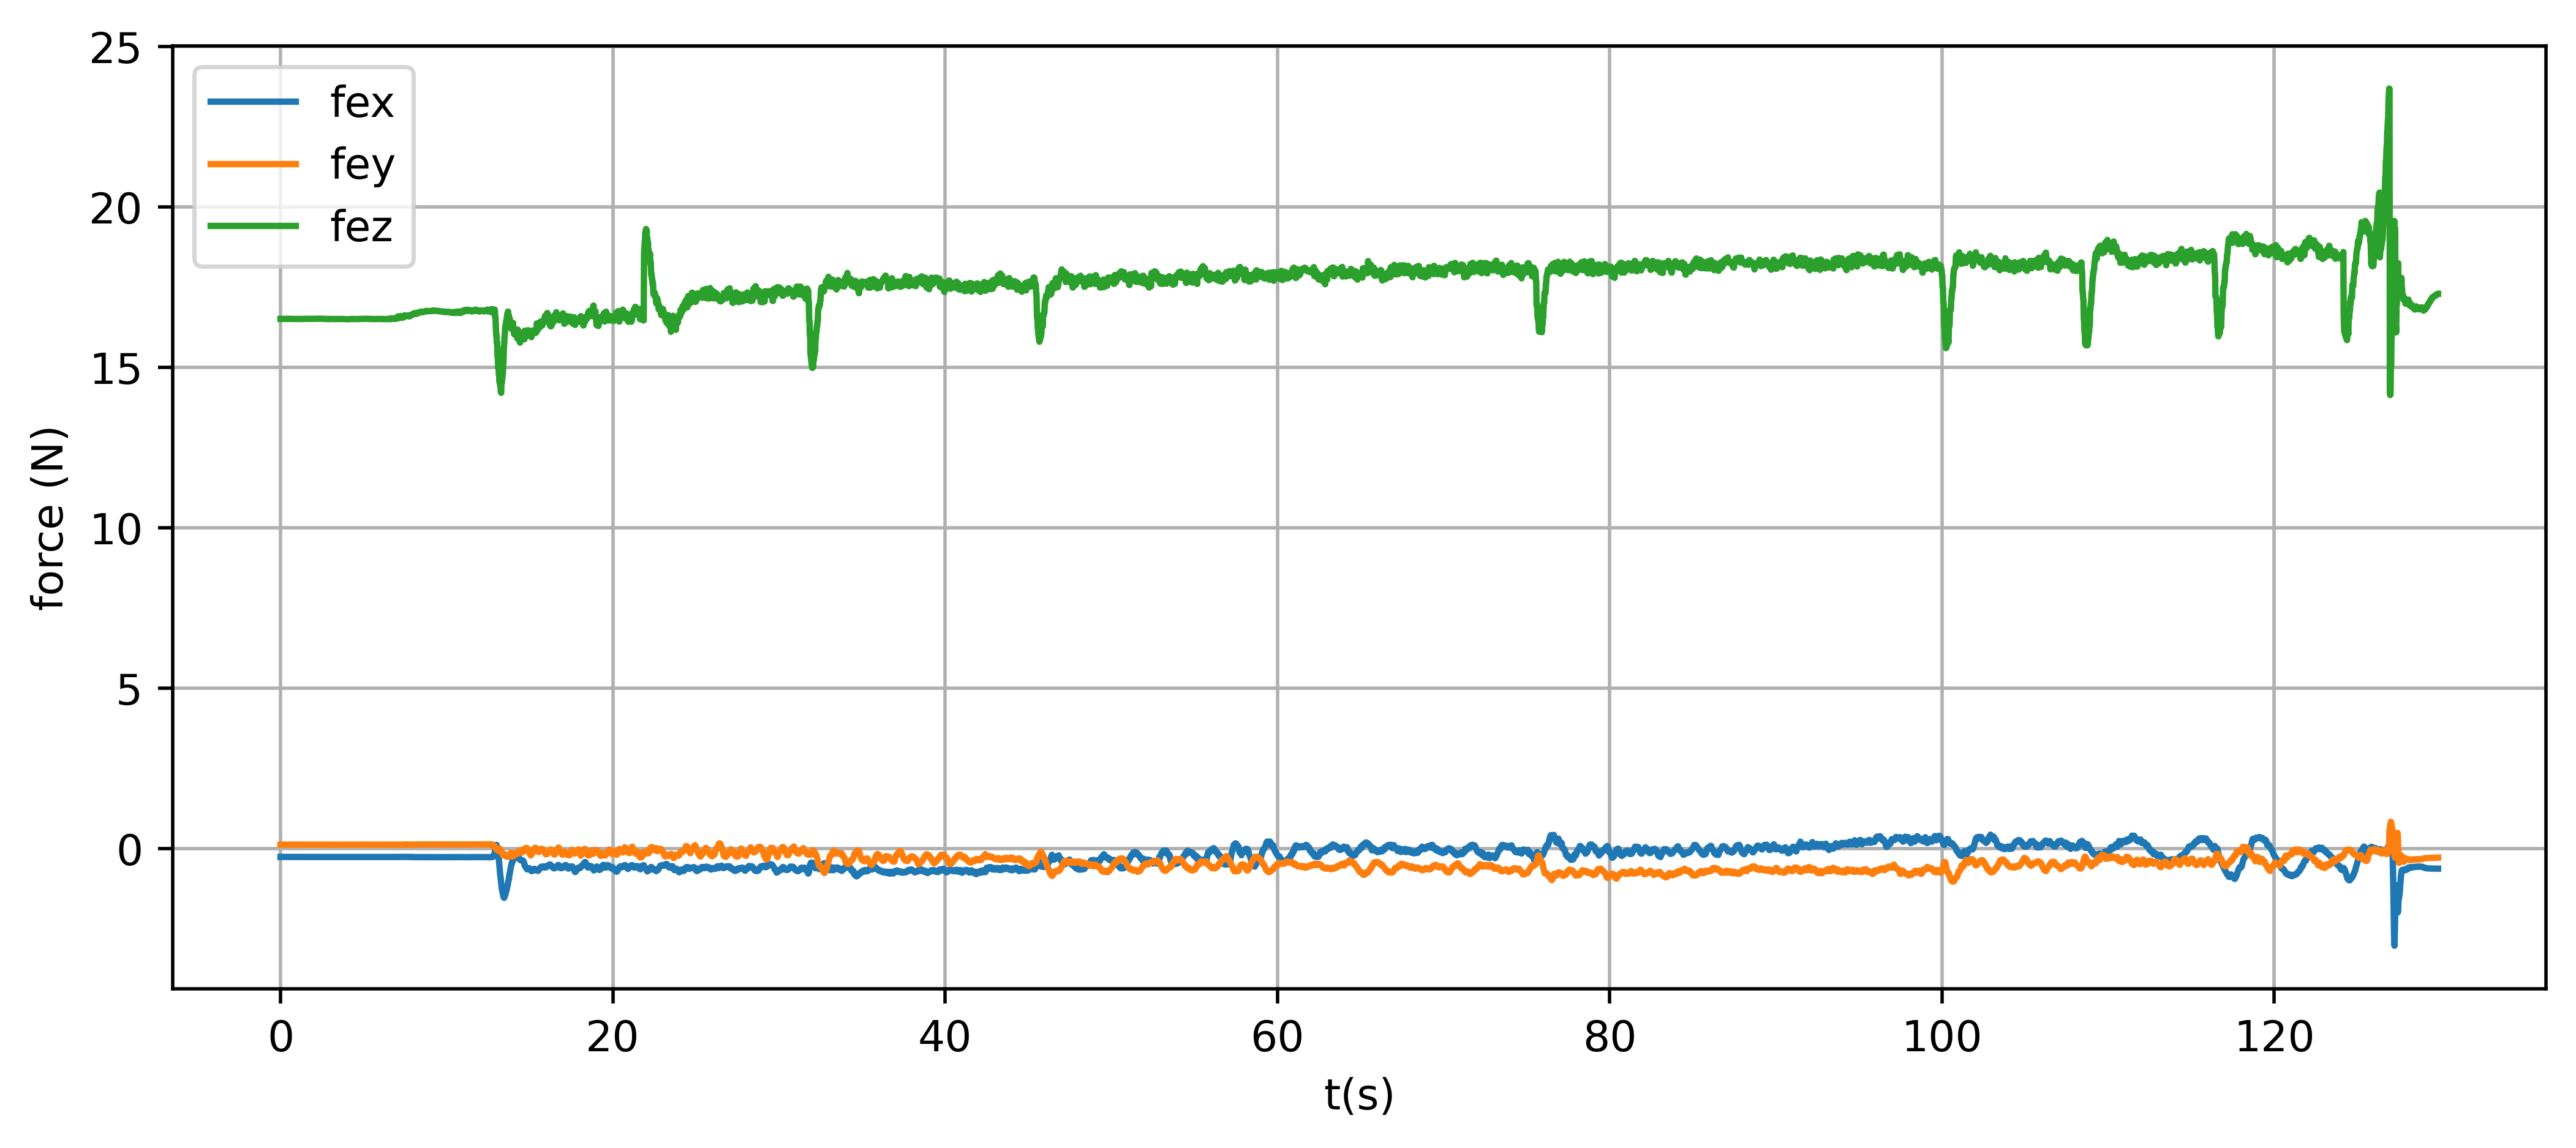

In [17]:
plt.figure(figsize=(10,4), dpi= 500)
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.x'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.y'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.z'][startIdx:endIdx])
plt.legend(['fex', 'fey', 'fez']) 
plt.ylabel('force (N)')
plt.xlabel('t(s)')
plt.grid(True)

Text(0.5, 0, 't(s)')

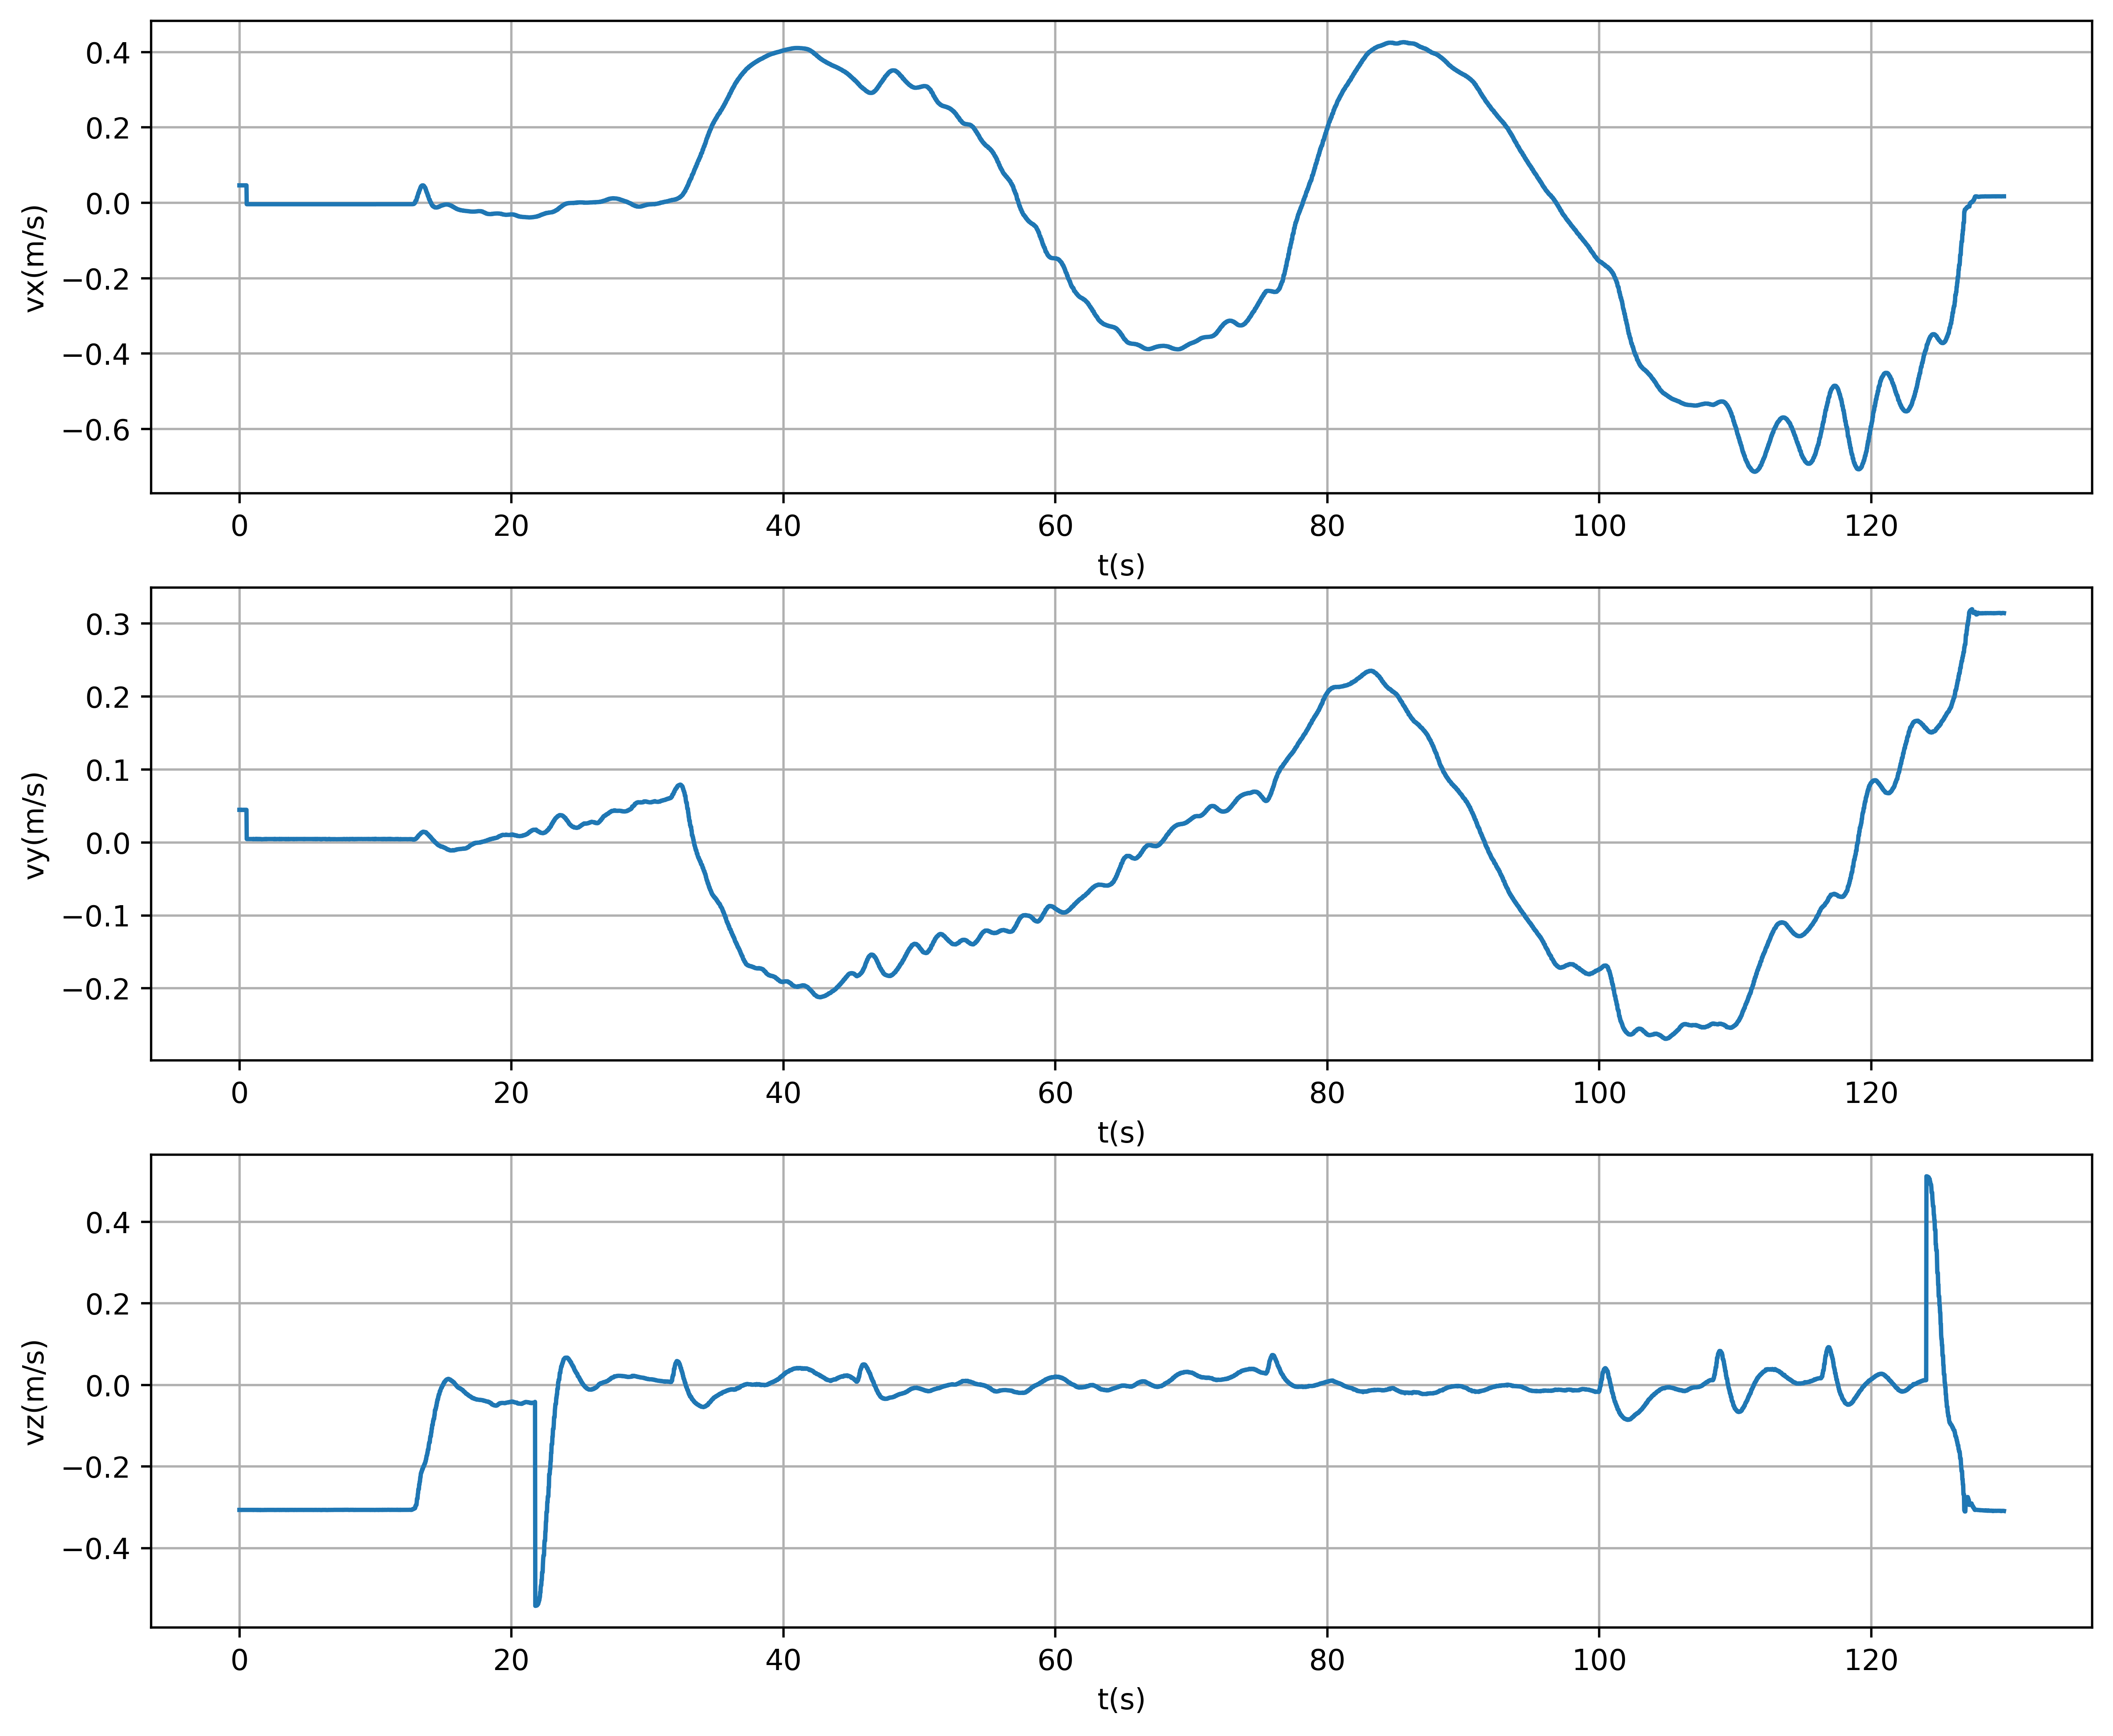

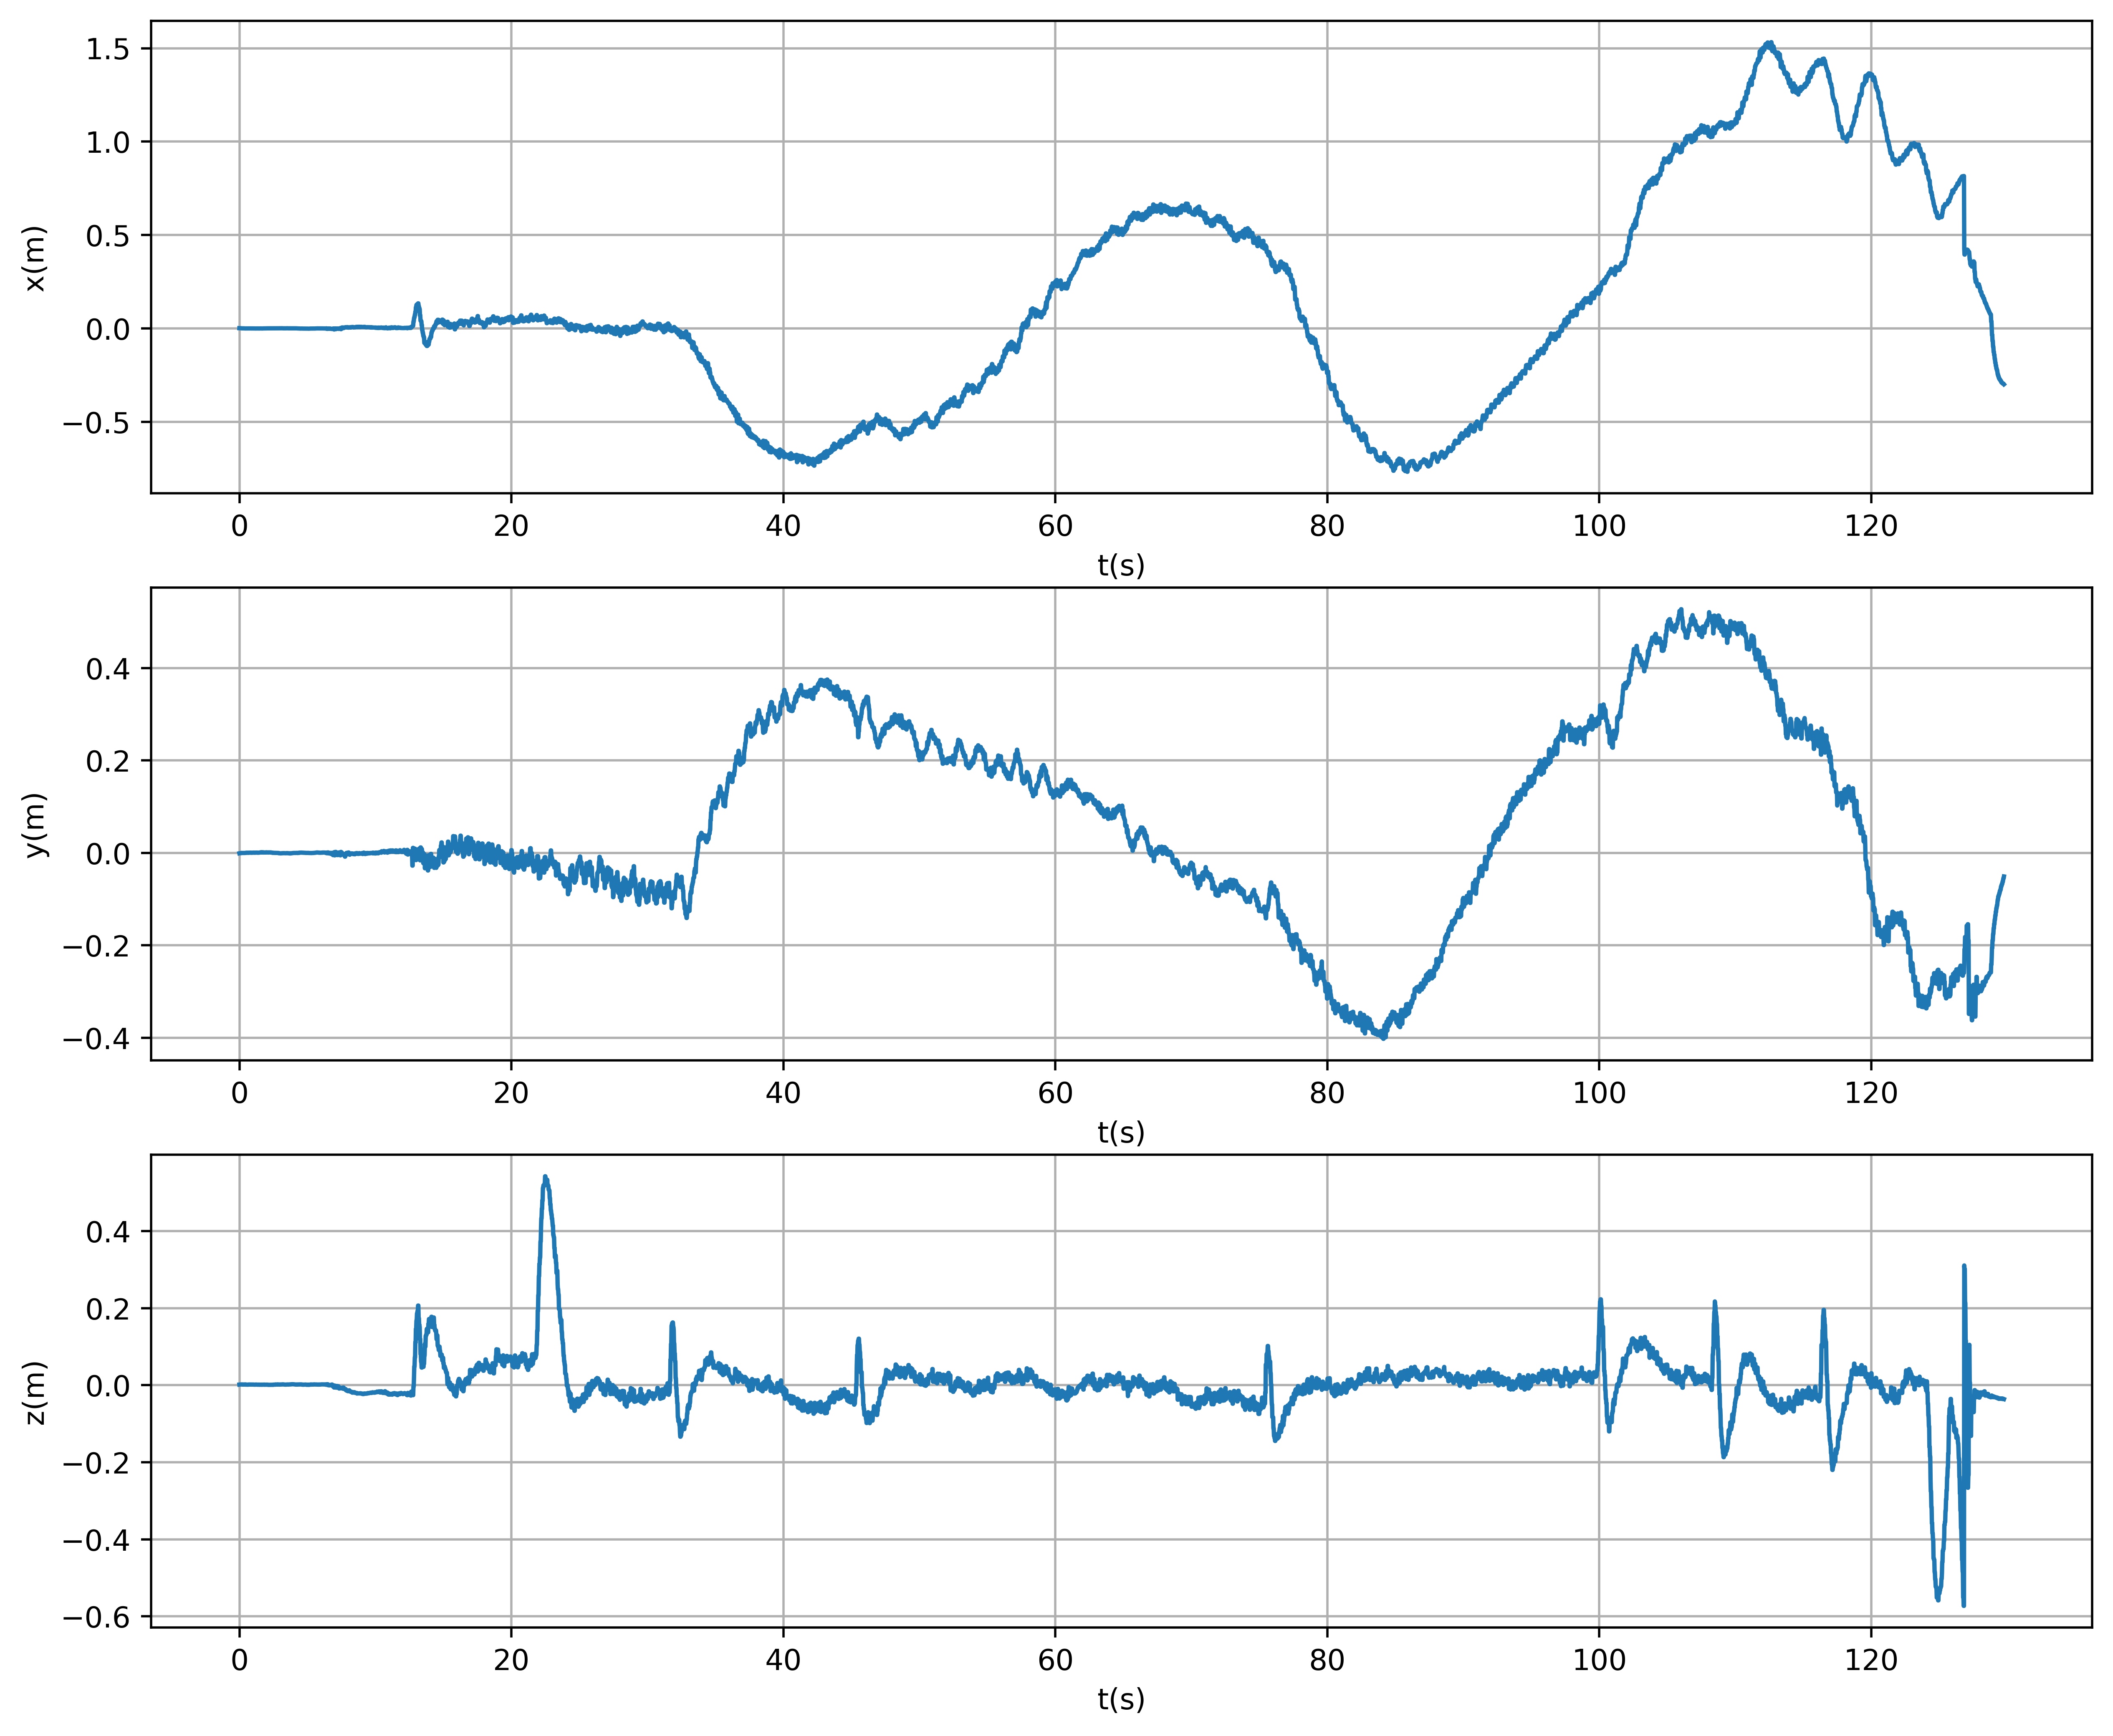

In [18]:
plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], loggings["pos_error"]["vector.x"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('vx(m/s)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], loggings["pos_error"]["vector.y"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('vy(m/s)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], loggings["pos_error"]["vector.z"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('vz(m/s)')
plt.xlabel('t(s)')

plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], loggings["vel_error"]["vector.x"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('x(m)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], loggings["vel_error"]["vector.y"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('y(m)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], loggings["vel_error"]["vector.z"][startIdx:endIdx])
plt.grid(True)
plt.ylabel('z(m)')
plt.xlabel('t(s)')

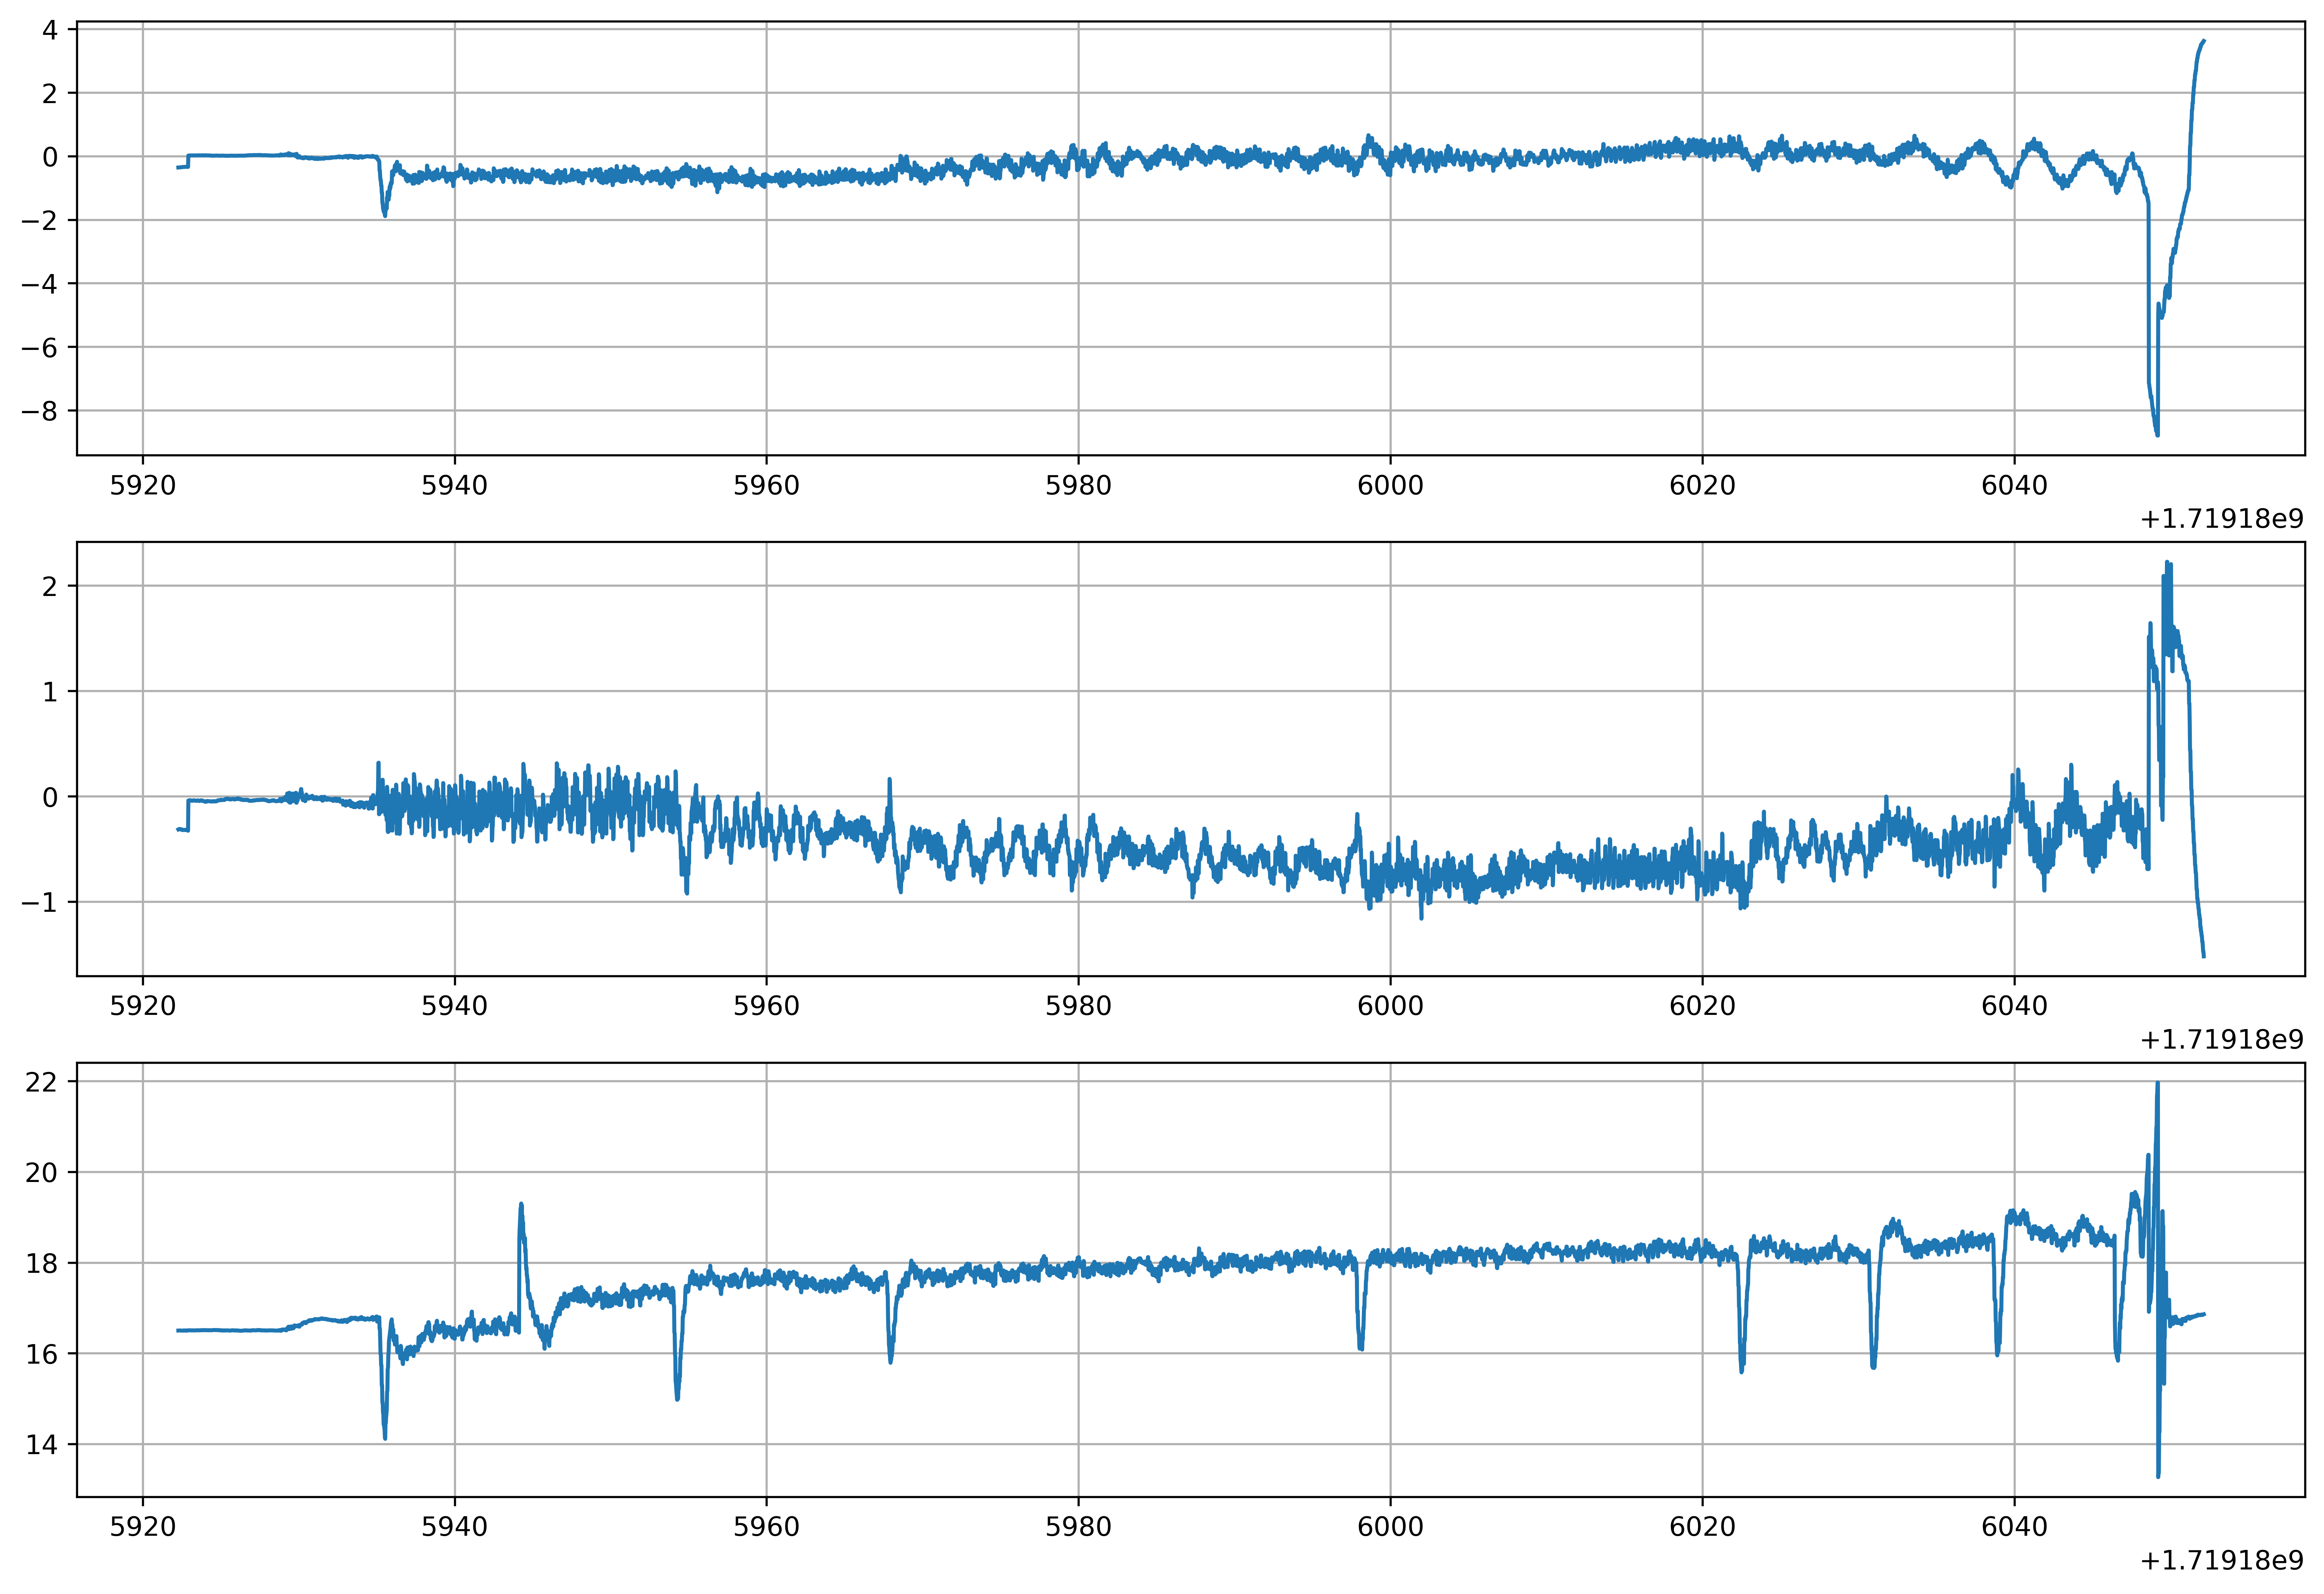

In [20]:
plt.figure(figsize=(15,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["acc_setpoint"]["Time"][startIdx:endIdx], loggings["acc_setpoint"]["vector.x"][startIdx:endIdx])
plt.grid(True)

plt.subplot(312)
plt.plot(loggings["acc_setpoint"]["Time"][startIdx:endIdx], loggings["acc_setpoint"]["vector.y"][startIdx:endIdx])
plt.grid(True)

plt.subplot(313)
plt.plot(loggings["acc_setpoint"]["Time"][startIdx:endIdx], loggings["acc_setpoint"]["vector.z"][startIdx:endIdx])
plt.grid(True)

Text(0.5, 0, 't(s)')

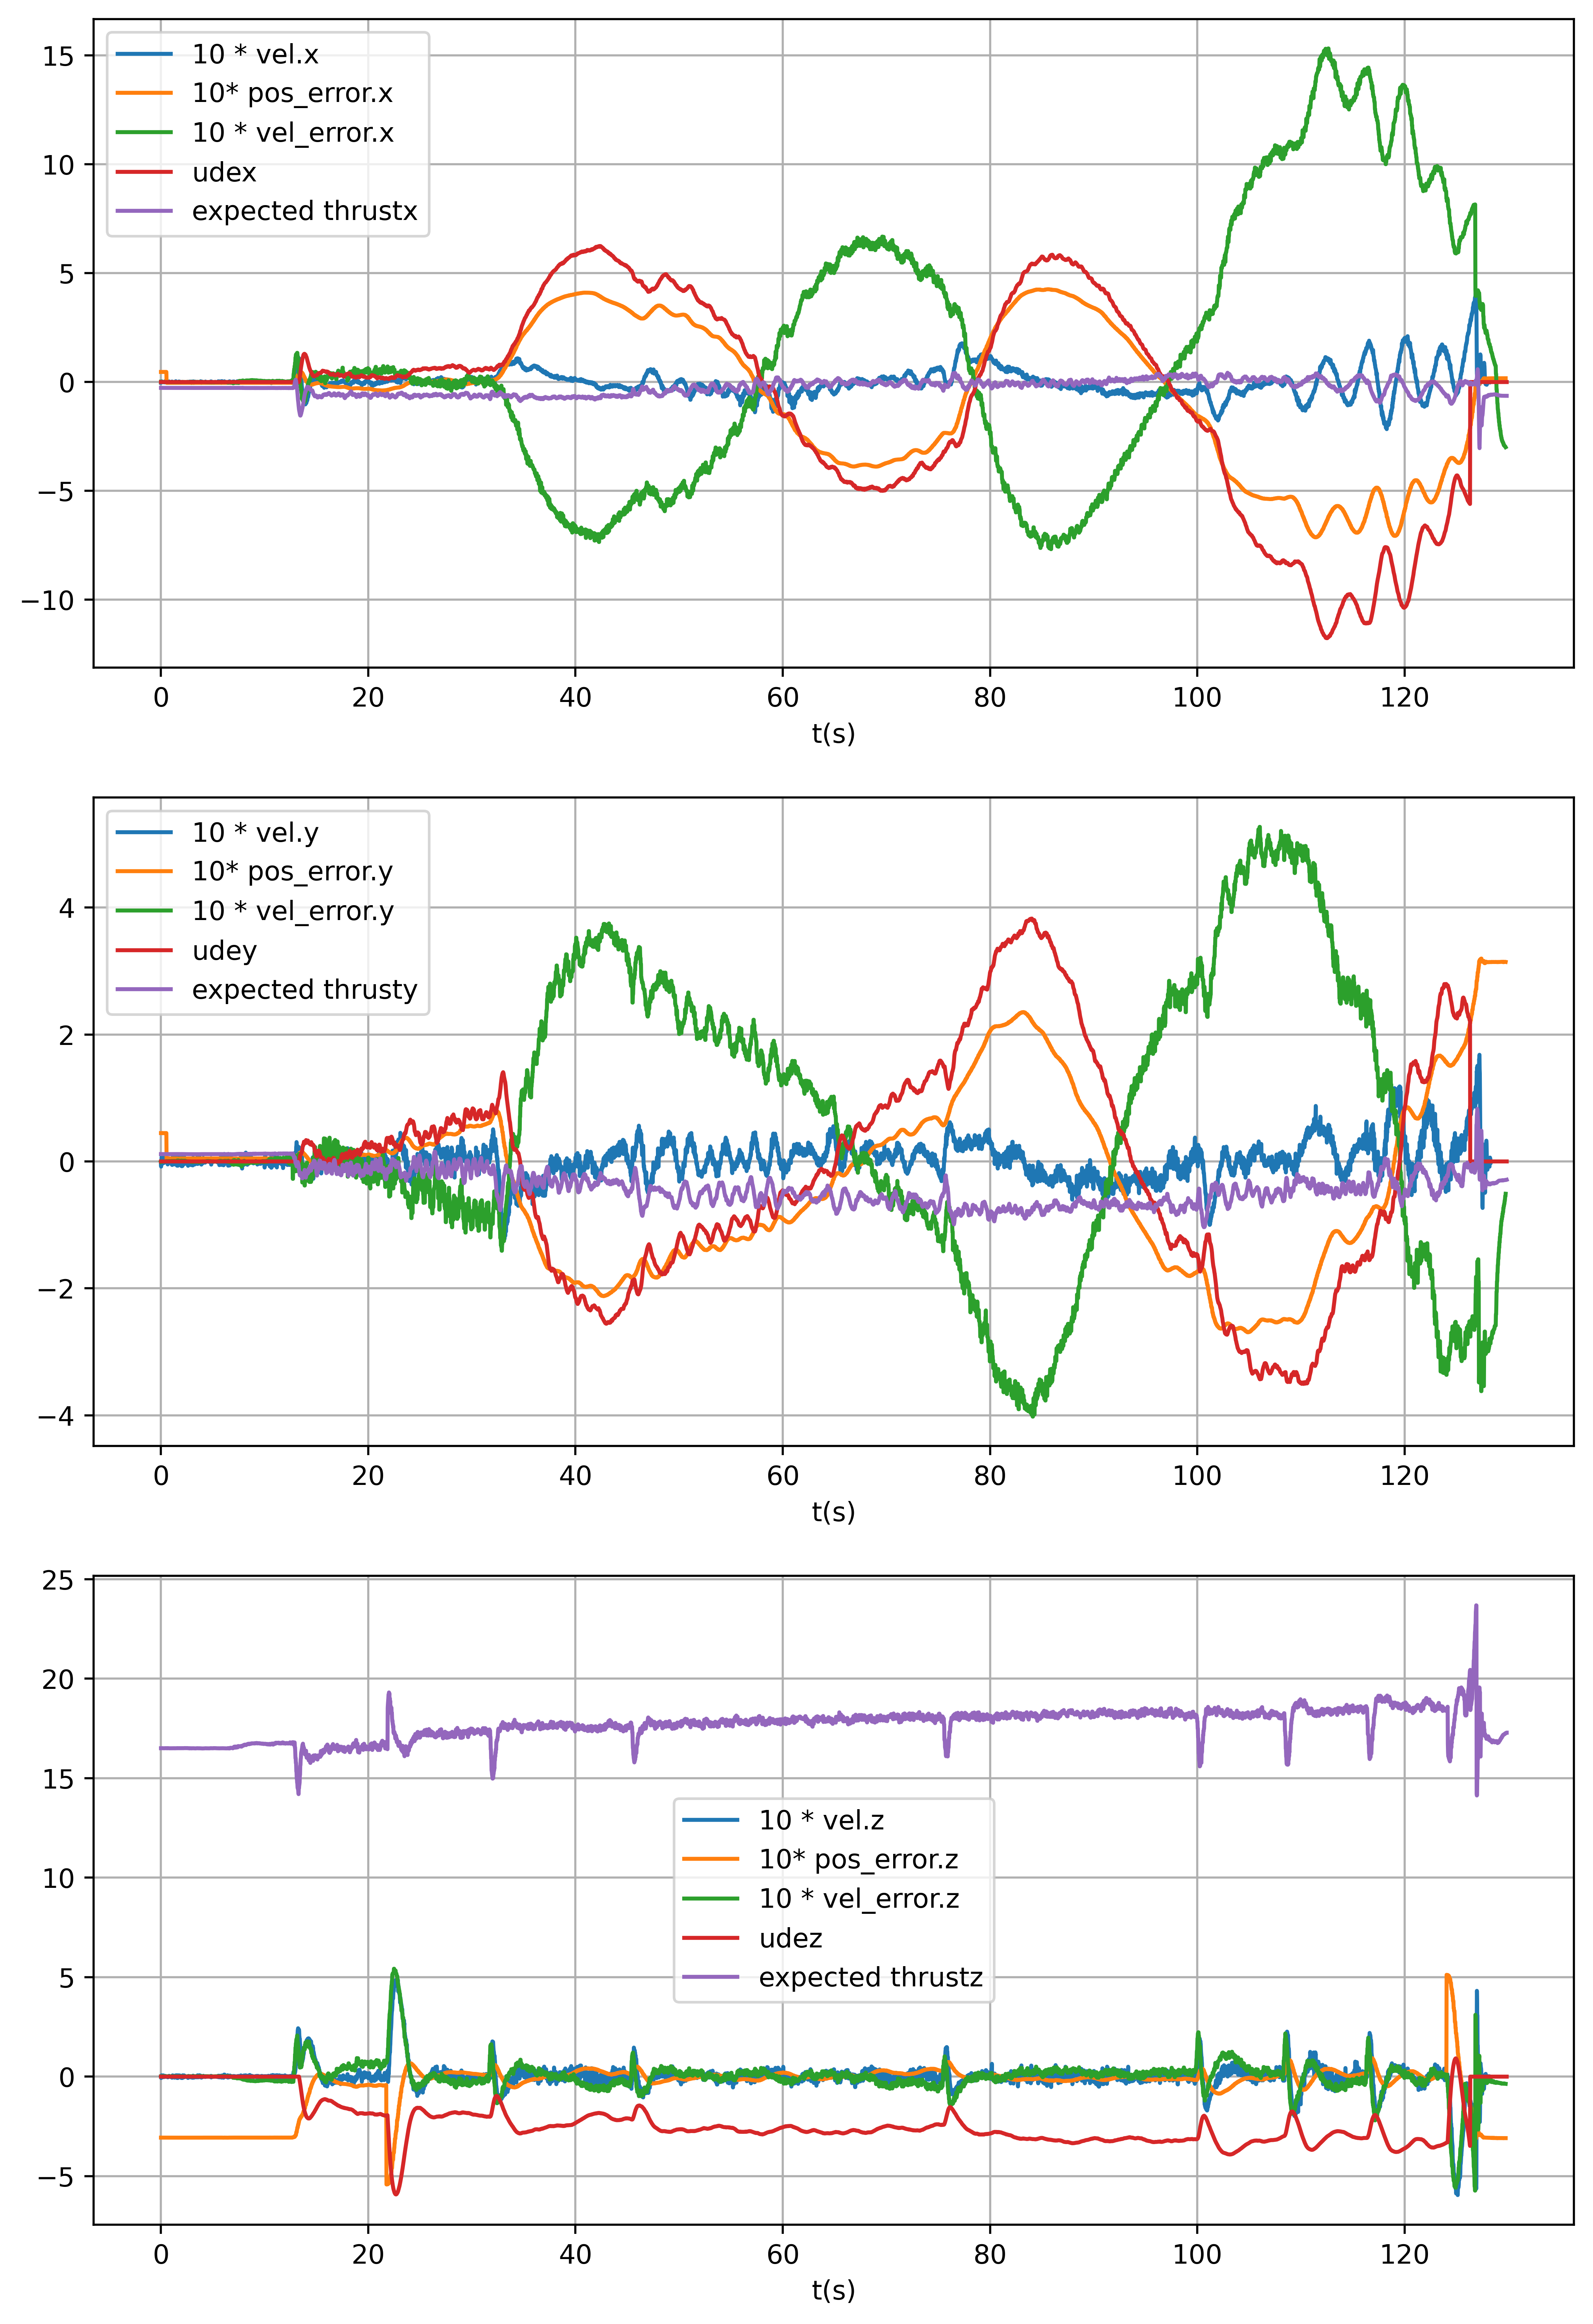

In [35]:
plt.figure(figsize=(10,15), dpi= 500)
plt.subplot(311)
plt.grid(True)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx],  10 *loggings["mocap"]['twist.linear.x'][startIdx:endIdx])
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], 10 * loggings["pos_error"]["vector.x"][startIdx:endIdx])
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], 10 * loggings["vel_error"]["vector.x"][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.x'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.x'][startIdx:endIdx])
#plt.plot(loggings["acc_setpoint"]["Time"][startIdx:endIdx], 10* loggings["acc_setpoint"]["vector.x"][startIdx:endIdx])
plt.legend(['10 * vel.x', '10* pos_error.x', '10 * vel_error.x', 'udex', 'expected thrustx']) 
plt.xlabel('t(s)')

plt.subplot(312)
plt.grid(True)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx],  10 *loggings["mocap"]['twist.linear.y'][startIdx:endIdx])
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], 10 * loggings["pos_error"]["vector.y"][startIdx:endIdx])
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], 10 * loggings["vel_error"]["vector.y"][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.y'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.y'][startIdx:endIdx])
plt.legend(['10 * vel.y', '10* pos_error.y', '10 * vel_error.y', 'udey', 'expected thrusty']) 
plt.xlabel('t(s)')

plt.subplot(313)
plt.grid(True)
plt.plot(loggings["mocap"]["processed_time"][startIdx:endIdx],  10 *loggings["mocap"]['twist.linear.z'][startIdx:endIdx])
plt.plot(loggings["pos_error"]["processed_time"][startIdx:endIdx], 10 * loggings["pos_error"]["vector.z"][startIdx:endIdx])
plt.plot(loggings["vel_error"]["processed_time"][startIdx:endIdx], 10 * loggings["vel_error"]["vector.z"][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['disturbanceEstimate.z'][startIdx:endIdx])
plt.plot(loggings["output"]["processed_time"][startIdx:endIdx], loggings["output"]['expectedThrust.z'][startIdx:endIdx])
plt.legend(['10 * vel.z', '10* pos_error.z', '10 * vel_error.z', 'udez', 'expected thrustz']) 
plt.xlabel('t(s)')



Text(0.5, 0, 't(s)')

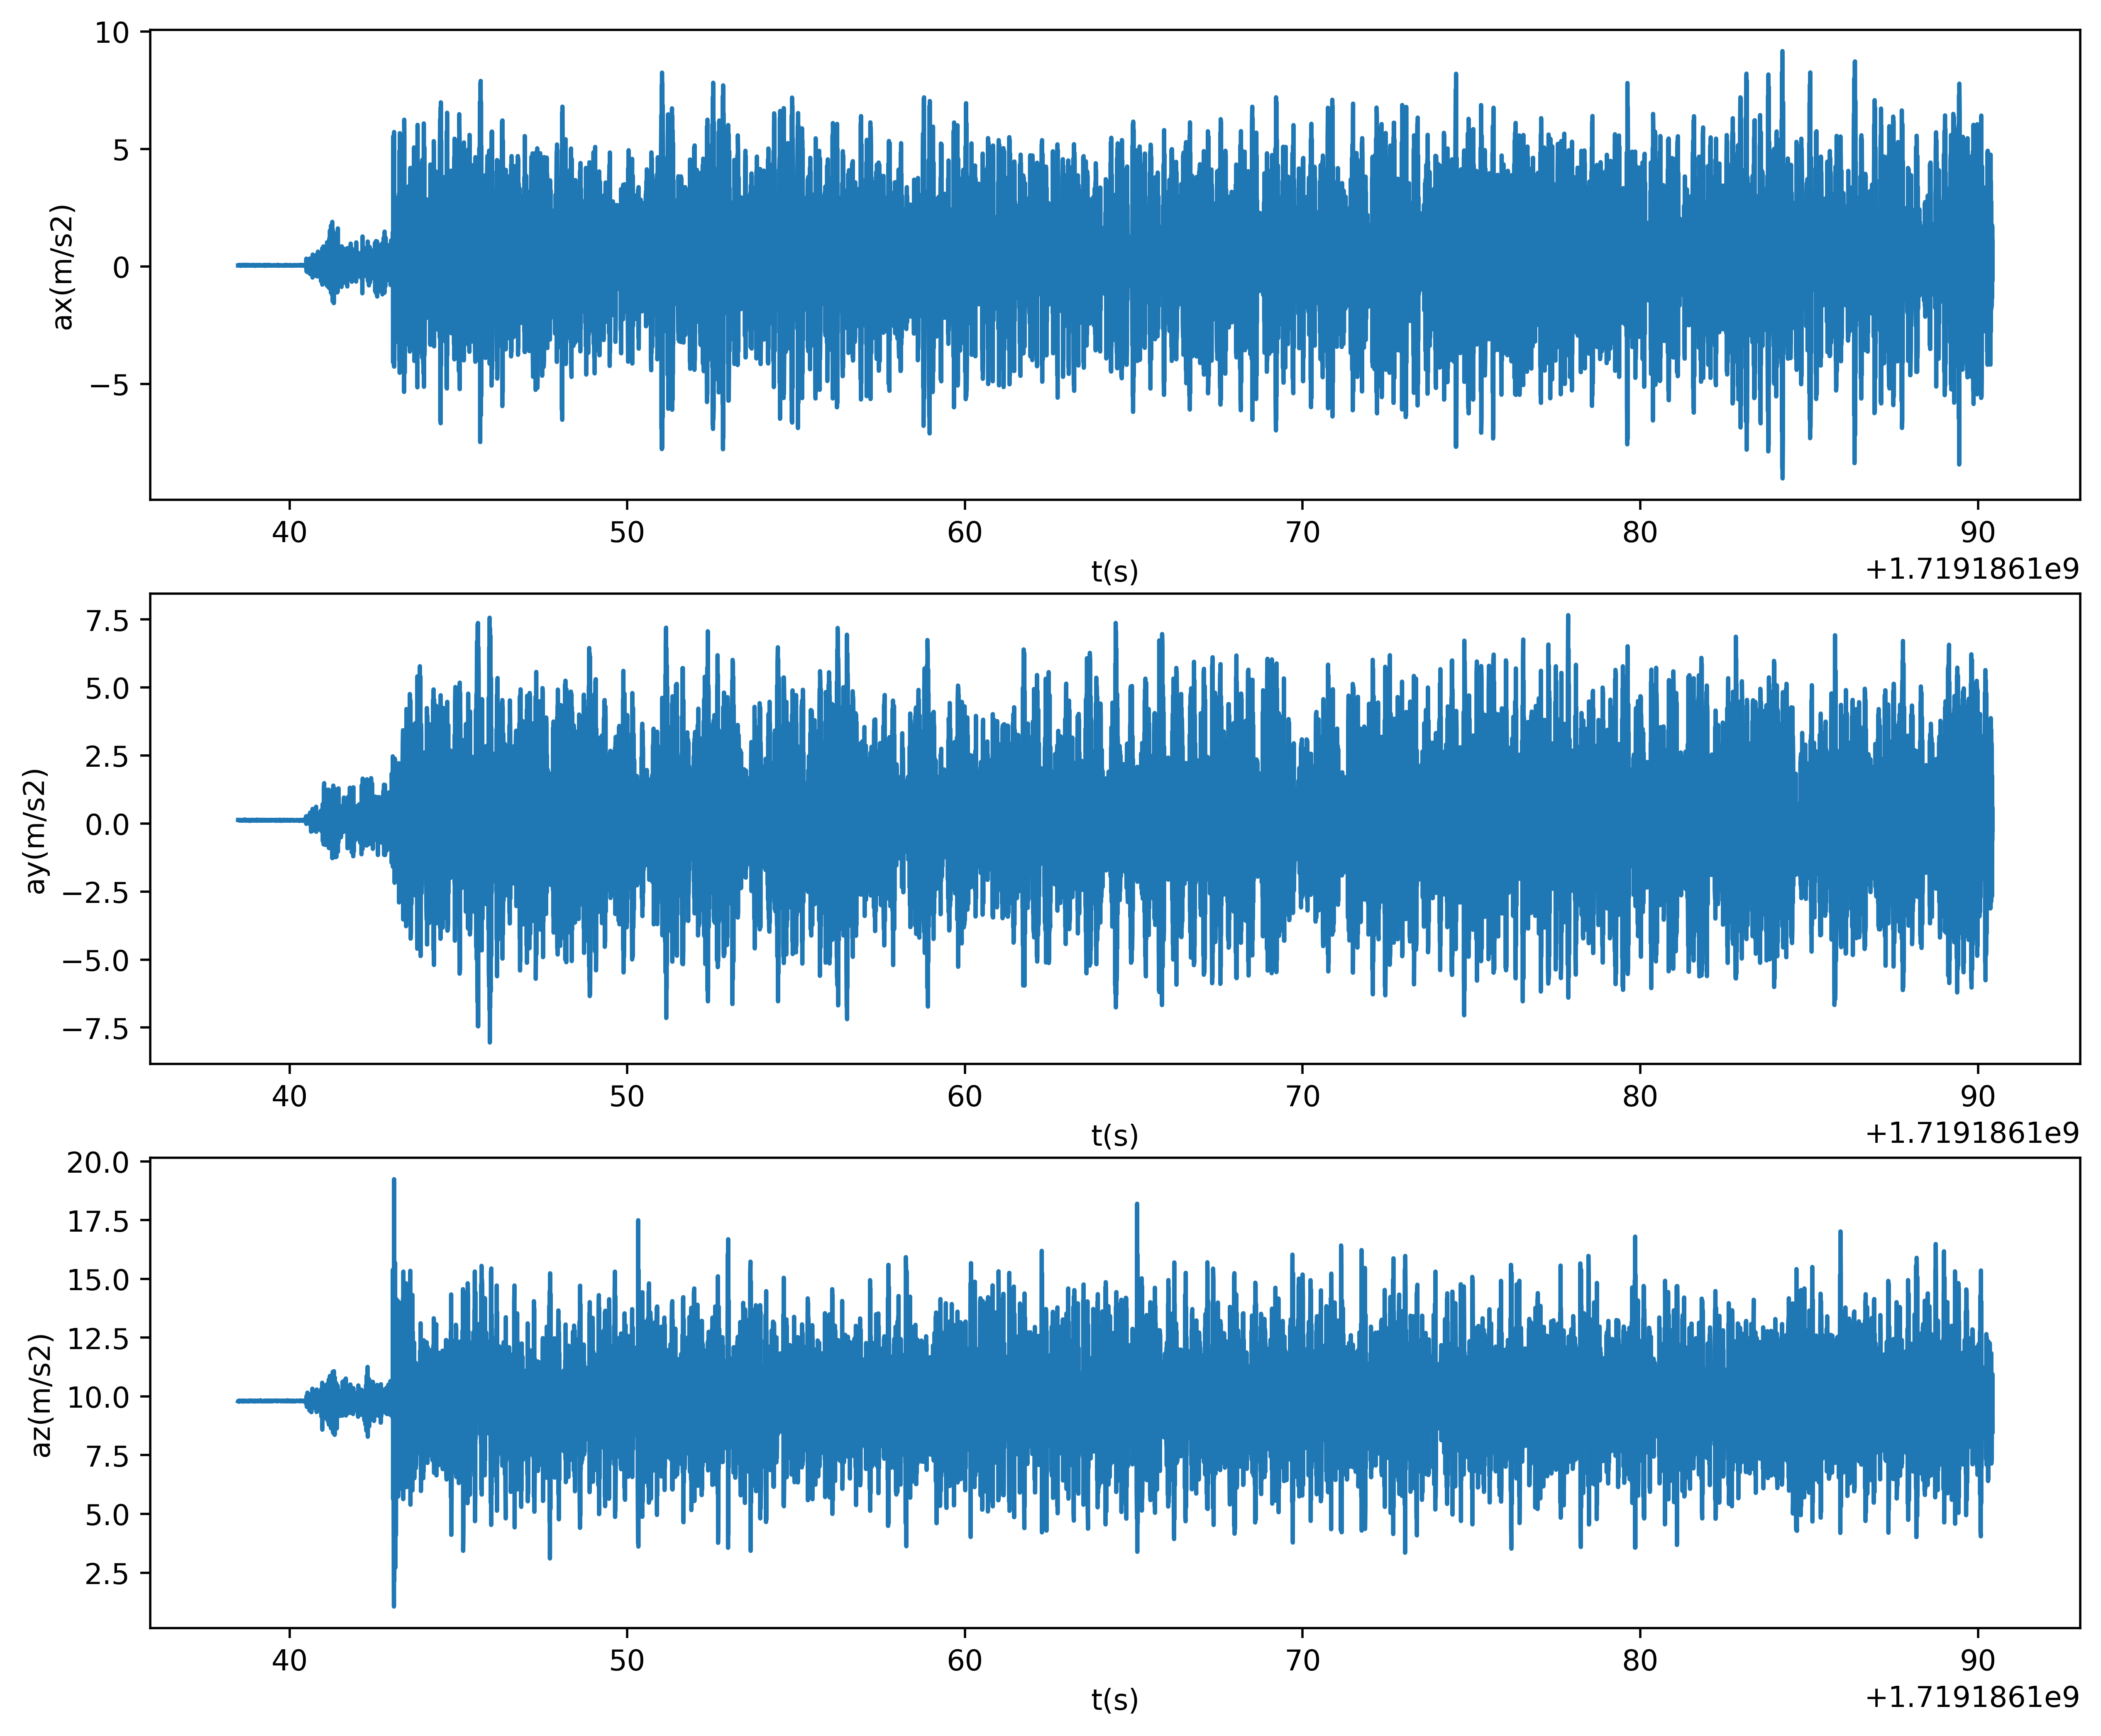

In [11]:
startIdx = 0
endIdx = 9000

plt.figure(figsize=(12,10), dpi= 500)
plt.subplot(311)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.x"][startIdx:endIdx])
plt.ylabel('ax(m/s2)')
plt.xlabel('t(s)')
plt.subplot(312)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.y"][startIdx:endIdx])
plt.ylabel('ay(m/s2)')
plt.xlabel('t(s)')
plt.subplot(313)
plt.plot(loggings["imu"]["processed_time"][startIdx:endIdx], loggings["imu"]["linear_acceleration.z"][startIdx:endIdx])
plt.ylabel('az(m/s2)')
plt.xlabel('t(s)')
